# Table of Contents
1. [Lead/Lag in PCS and Mosaic Stocks](#Lead-or-Lag-in-PCS-and-Mosaic-Stocks?)
 1. [5 Week Lead of Stocks to DAP](#so-DAP-may-lag-5-weeks-so-now-change-data-so-that-there-is-a-column-that-has-DAP-5-weeks-earlier)
 2. [7 Week Lead of Stocks to DAP](#Now-I-will-have-DAP-7-weeks-up)
2. [Percent Change in Stocks](#Could-look-at-percent-change-in-the-stocks)
3. Predict DAP Using Stocks and No Lead/Lag
    1. [Exploratory Analysis](#Exploratory-Analysis,-including-the-stock-information,-and-no-lead-or-lag)
    2. [MLR Models](#Determining-MLR-Models-to-Use,-using-stocks-and-no-lead-or-lag)
    3. [RDF Models](#RDF-Analysis,-using-stocks,-no-lead-or-lag)
4. Predict DAP Using 7 Week Lead of Stocks to DAP
 1. [Exploratory Analysis](#Exploratory-Analysis-with-Stocks-Leading-DAP-by-7-Weeks)
 2. [MLR Models](#MLR-Models-First)
 3. [RDF Models](#RDF-analysis,-stocks-included-7-week-lead-in-stocks)
5. Predict DAP Not Using Stocks or Leads
 1. [Exploratory Analysis](#Exploratory-Analysis,-no-stocks,-no-lead-or-lag-of-DAP)
 2. [MLR Models](#MLR-Models)
 3. [RDF Models](#RDF-Analysis,-no-stocks,-no-lead-or-lag-in-DAP)
 4. [Average Case](#Avg-Case)
 5. [Best Case](#Best-Case)
 6. [Worst Case](#Worst-Case)

# Lead or Lag in PCS and Mosaic Stocks?
[Top](#Table-of-Contents)

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
df_96on = data[['Date','DAP','PCS_Stock','Mosaic_Stock']]
print(df_96on.tail())
#1/5/1996-5/27/2016

from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

           Date  DAP  PCS_Stock  Mosaic_Stock
1060  4/29/2016  325      17.72         27.99
1061   5/6/2016  330      15.89         25.99
1062  5/13/2016  320      15.69         24.84
1063  5/20/2016  311      16.53         25.94
1064  5/27/2016  308      16.57         25.69


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Date            datetime64[ns]
DAP                      int64
PCS_Stock              float64
Mosaic_Stock           float64
dtype: object

                   DAP  PCS_Stock  Mosaic_Stock
DAP           1.000000   0.903068      0.875757
PCS_Stock     0.903068   1.000000      0.892358
Mosaic_Stock  0.875757   0.892358      1.000000


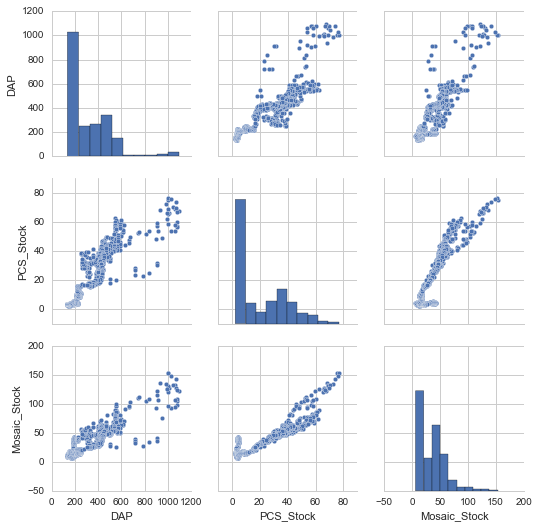

In [3]:
print(df_96on.corr())
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df_96on, size=2.5);
plt.show()

In [2]:
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
print(df_96on.dtypes)
df_96on.index = df_96on['Date'].values
df_96on = df_96on.drop(['Date'],axis=1)
df_96on.head(2)

Date            datetime64[ns]
DAP                      int64
PCS_Stock              float64
Mosaic_Stock           float64
dtype: object


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,DAP,PCS_Stock,Mosaic_Stock
1996-01-05,230,3.7639,40.125
1996-01-12,228,3.9028,39.375


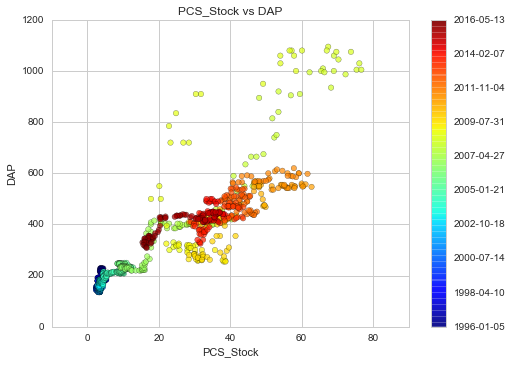

In [187]:
# Plot data and use colormap to indicate the date each point corresponds to
X = df_96on[['PCS_Stock']]
Y = df_96on[['DAP']]
cm = plt.get_cmap('jet')
colors = np.linspace(0.1, 1, len(X))
sc = plt.scatter(X, Y, s=30, c=colors, cmap=cm, edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([str(p.date()) for p in X[::len(X)//9].index])
plt.title('PCS_Stock vs DAP')
plt.xlabel('PCS_Stock')
plt.ylabel('DAP')

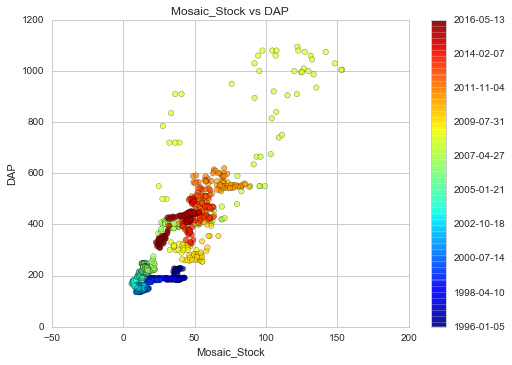

In [189]:
X = df_96on[['Mosaic_Stock']]
Y = df_96on[['DAP']]
cm = plt.get_cmap('jet')
colors = np.linspace(0.1, 1, len(X))
sc = plt.scatter(X, Y, s=30, c=colors, cmap=cm, edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([str(p.date()) for p in X[::len(X)//9].index])
plt.title('Mosaic_Stock vs DAP')
plt.xlabel('Mosaic_Stock')
plt.ylabel('DAP')

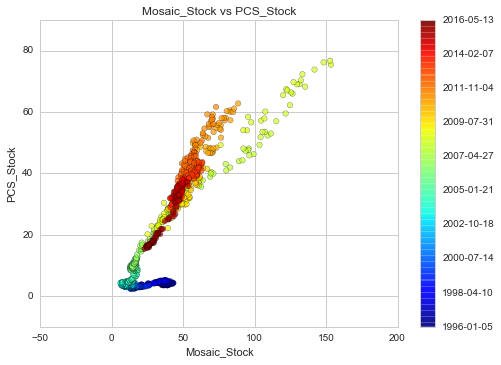

In [190]:
X = df_96on[['Mosaic_Stock']]
Y = df_96on[['PCS_Stock']]
cm = plt.get_cmap('jet')
colors = np.linspace(0.1, 1, len(X))
sc = plt.scatter(X, Y, s=30, c=colors, cmap=cm, edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([str(p.date()) for p in X[::len(X)//9].index])
plt.title('Mosaic_Stock vs PCS_Stock')
plt.xlabel('Mosaic_Stock')
plt.ylabel('PCS_Stock')
#looks like different slope, 1996-2000, 2002-early 2007, mid 2007-2009, 2011-2016

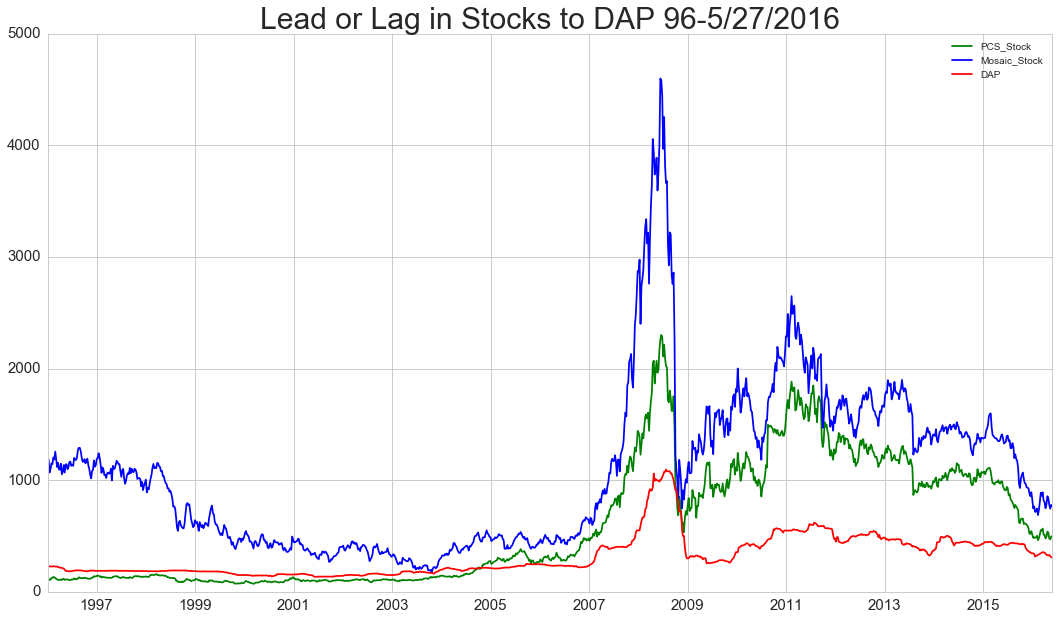

In [191]:
#trend, just modify to look at the different variables and scaling
y1 = (df_96on['PCS_Stock'])*30
y2 = (df_96on['Mosaic_Stock'])*30
y3 = (df_96on['DAP'])
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
ax.plot(y1,'g')
ax.plot(y2,'b')
ax.plot(y3,'r')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Lead or Lag in Stocks to DAP 96-5/27/2016', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
plt.show()
#looking at this graph prior to 2007 only Mosaic stock was noticibly changing 
#as for mosaic and PCS mosaic seems to lead by a bit and then DAP lags most, however every once in a while it looks
#like PCS leads mosaic at times too

In [3]:
#fit a OLS model with all, see how R^2 changes
import statsmodels.api as sm
X = df_96on[['PCS_Stock','Mosaic_Stock']]
Y = df_96on[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
r_square = est.rsquared
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     2778.
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        08:21:56   Log-Likelihood:                -6096.4
No. Observations:                1065   AIC:                         1.220e+04
Df Residuals:                    1062   BIC:                         1.221e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          104.1008      4.190     24.844      0.000        95.879   112.323
PCS_Stock        6.0574      0.276     21.914      0.000         5.515     6.600
Mosaic_Stock     2.6097      0.207     12.598      0.000         2.203     3.016
==============================================================================
Omnibus:                      577.293   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7884.902
Skew:                           2.180   Prob(JB):                         0.00
Kurtosis:                      15.596   Cond. No.                         93.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
tsa = sm.tsa
acf, Q, pvalue = tsa.acf(est.resid, nlags=4, qstat=True,unbiased=True)
#partial autocorrelation
print(tsa.pacf(est.resid, nlags=4))
print(acf)
print(Q)
print(pvalue)

[ 1.          0.96267121 -0.06214912  0.03049952 -0.04591991]
[ 1.          0.96267121  0.92218255  0.88532872  0.84686814]
[  989.75650212  1898.86258058  2737.54708643  3505.66913586]
[  3.02583013e-217   0.00000000e+000   0.00000000e+000   0.00000000e+000]


In [44]:
X = df_96on[['PCS_Stock']]
Y = df_96on[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
r_square = est.rsquared
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     4700.
Date:                Thu, 23 Jun 2016   Prob (F-statistic):               0.00
Time:                        08:55:48   Log-Likelihood:                -6170.5
No. Observations:                1065   AIC:                         1.235e+04
Df Residuals:                    1063   BIC:                         1.235e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        135.4127      3.615     37.458      0.000       128.319   142.506
PCS_Stock      9.1651      0.134     68.553      0.000         8.903     9.427
==============================================================================
Omnibus:                      587.094   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6577.416
Skew:                           2.308   Prob(JB):                         0.00
Kurtosis:                      14.266   Cond. No.                         40.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
tsa = sm.tsa
acf, Q, pvalue = tsa.acf(est.resid, nlags=4, qstat=True,unbiased=True)
#partial autocorrelation
print(tsa.pacf(est.resid, nlags=4))
print(acf)
print(Q)
print(pvalue)

[ 1.          0.97226257 -0.06636284  0.03951325 -0.07851089]
[ 1.          0.97226257  0.94166408  0.91393285  0.88302756]
[ 1009.57718696  1957.49956194  2851.25374871  3686.37043659]
[  1.48778613e-221   0.00000000e+000   0.00000000e+000   0.00000000e+000]


In [46]:
X = df_96on[['Mosaic_Stock']]
Y = df_96on[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
r_square = est.rsquared
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     3498.
Date:                Thu, 23 Jun 2016   Prob (F-statistic):               0.00
Time:                        08:55:56   Log-Likelihood:                -6295.0
No. Observations:                1065   AIC:                         1.259e+04
Df Residuals:                    1063   BIC:                         1.260e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           80.1469      4.872     16.450      0.000        70.587    89.707
Mosaic_Stock     6.6603      0.113     59.146      0.000         6.439     6.881
==============================================================================
Omnibus:                      309.926   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2075.674
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                       9.432   Cond. No.                         77.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
tsa = sm.tsa
acf, Q, pvalue = tsa.acf(est.resid, nlags=4, qstat=True,unbiased=True)
#partial autocorrelation
print(tsa.pacf(est.resid, nlags=4))
print(acf)
print(Q)
print(pvalue)

[ 1.          0.96678951 -0.03307019 -0.00183739  0.00392593]
[ 1.          0.96678951  0.93252187  0.89927508  0.867459  ]
[  998.24296299  1927.84874961  2793.164532    3599.09312058]
[  4.32695865e-219   0.00000000e+000   0.00000000e+000   0.00000000e+000]


### All regression models have a kurtosis >3 so highly peaked with fat tails, prob(JB) less than 0.05 so model likely doesn't follow normal distribution, Durbin Watson less than 2 so positive autocorrelation
### Since there is positive correlation when there is an increase seen in one time series will lead to proportionate increase in the other time series
### if you know a stock historically has a high positive autocorrelation value and you witnessed the stock making solid gains over the past several days, you might reasonably expect the movements over the upcoming several days (the leading time series) to match those of the lagging time series and to move upwards.
### now I need to figure out how much lead or lag
### the easiest solution in finance is to simply convert a series of historical prices into a series of percentage-price changes from day to day.

In [194]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    orig = ax.plot(timeseries, color='blue',label='Original')
    mean = ax.plot(rolmean, color='red', label='Rolling Mean')
    ax.legend(loc='best')
    ax.set_title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

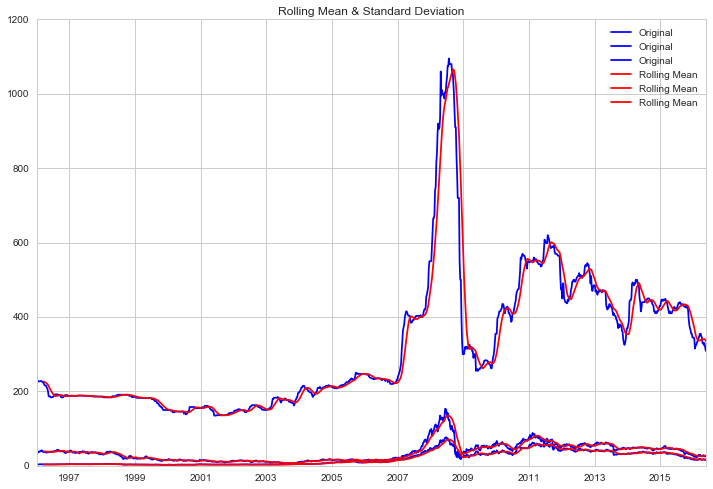

In [195]:
test_stationarity(df_96on)

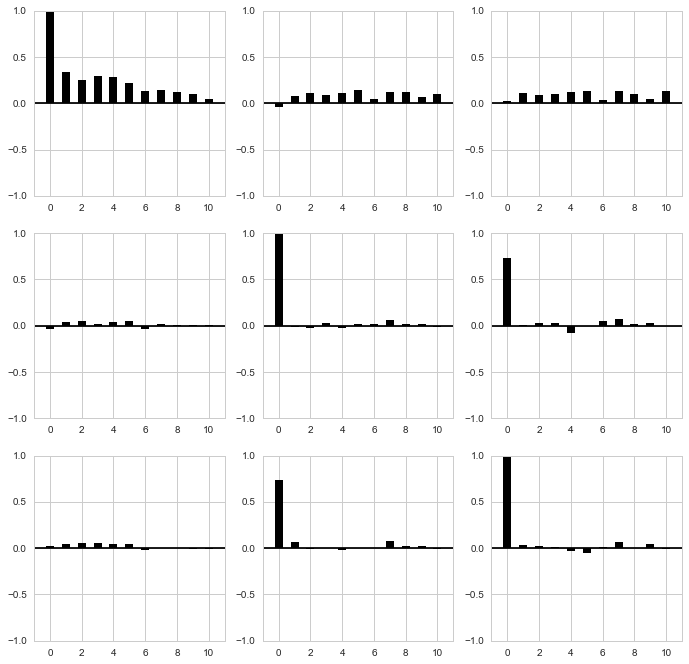

In [196]:
# fit the model with two lags of the log differentiated data, VAR sample autocorrelation
data = np.diff(np.log(df_96on), axis=0)
model = tsa.VAR(data)
res = model.fit(2)
res.plot_sample_acorr() #DAP on top, PCS then Mosaic: DAP->DAP, DAP->PCS,...

In [197]:
#lag order selection
model.select_order(15) #so looks like lag of 5 most common in choice, since weekly it would be 5 weeks

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        -19.58       -19.56    3.145e-09       -19.57
1        -19.72      -19.66*    2.727e-09       -19.70
2        -19.74       -19.64    2.667e-09       -19.70
3        -19.77       -19.63    2.589e-09       -19.72
4        -19.79       -19.61    2.541e-09      -19.72*
5       -19.80*       -19.57   2.525e-09*       -19.71
6        -19.79       -19.52    2.536e-09       -19.69
7        -19.80       -19.48    2.528e-09       -19.68
8        -19.78       -19.43    2.556e-09       -19.65
9        -19.77       -19.38    2.588e-09       -19.62
10       -19.77       -19.33    2.606e-09       -19.60
11       -19.78       -19.30    2.570e-09       -19.60
12       -19.78       -19.26    2.558e-09       -19.59
13       -19.77       -19.21    2.586e-09       -19.56
14       -19.76       -19.15    2.619e-09       -19.53
15       -

{'aic': 5, 'bic': 1, 'fpe': 5, 'hqic': 4}

## so DAP may lag 5 weeks so now change data so that there is a column that has DAP 5 weeks earlier
[Top](#Table-of-Contents)

In [4]:
df_96on['DAP_up5weeks'] = df_96on.DAP.shift(-5) #aic chose this
df_96on.tail(6)

,DAP,PCS_Stock,Mosaic_Stock,DAP_up5weeks
2016-04-22,330,17.94,28.55,308
2016-04-29,325,17.72,27.99,NaN
2016-05-06,330,15.89,25.99,NaN
2016-05-13,320,15.69,24.84,NaN
2016-05-20,311,16.53,25.94,NaN
2016-05-27,308,16.57,25.69,NaN


In [199]:
df_96on.corr()

,DAP,PCS_Stock,Mosaic_Stock,DAP_up5weeks
DAP,1.000000,0.903068,0.875757,0.975983
PCS_Stock,0.903068,1.000000,0.892358,0.919415
Mosaic_Stock,0.875757,0.892358,1.000000,0.906236
DAP_up5weeks,0.975983,0.919415,0.906236,1.000000


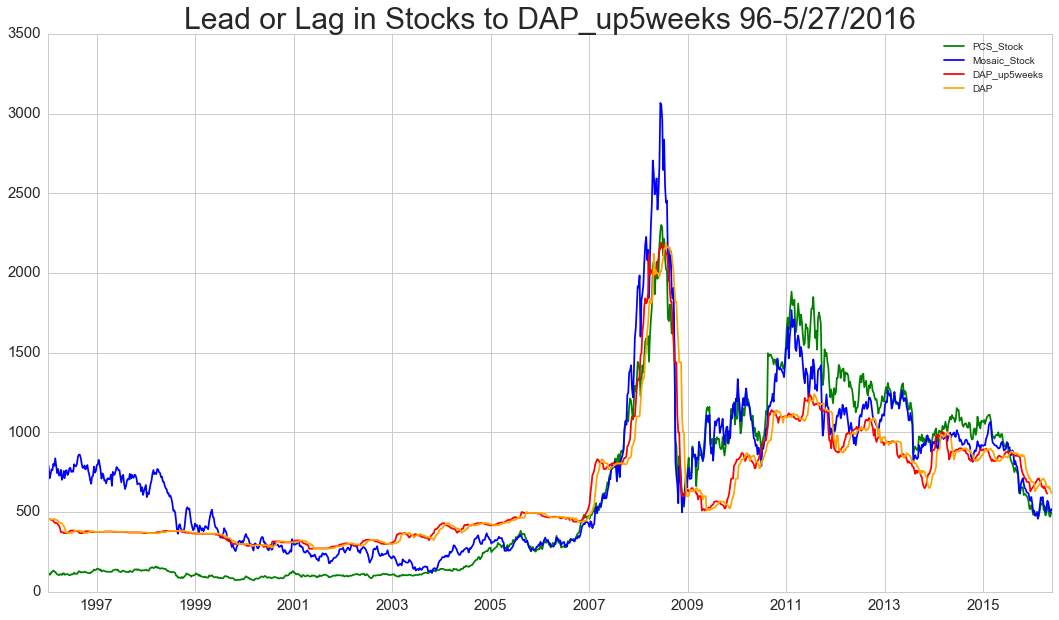

In [200]:
y1 = (df_96on['PCS_Stock'])*30
y2 = (df_96on['Mosaic_Stock'])*20
y3 = (df_96on['DAP_up5weeks'])*2
y4 = (df_96on['DAP'])*2
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
ax.plot(y1,'g')
ax.plot(y2,'b')
ax.plot(y3,'r')
ax.plot(y4,'orange')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Lead or Lag in Stocks to DAP_up5weeks 96-5/27/2016', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
plt.show()

In [5]:
df_96on2 = df_96on[0:1060]
df_96on2.tail()

,DAP,PCS_Stock,Mosaic_Stock,DAP_up5weeks
2016-03-25,355,17.08,27.26,325
2016-04-01,348,17.03,26.84,330
2016-04-08,345,15.96,24.96,320
2016-04-15,330,16.42,26.11,311
2016-04-22,330,17.94,28.55,308


In [6]:
#fit a OLS model with all, see how R^2 changes
import statsmodels.api as sm
X = df_96on2[['PCS_Stock','Mosaic_Stock']]
Y = df_96on2[['DAP_up5weeks']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
r_square = est.rsquared
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DAP_up5weeks   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     3929.
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        08:23:11   Log-Likelihood:                -5909.2
No. Observations:                1060   AIC:                         1.182e+04
Df Residuals:                    1057   BIC:                         1.184e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           93.9392      3.616     25.980      0.000        86.844   101.034
PCS_Stock        5.5144      0.238     23.160      0.000         5.047     5.982
Mosaic_Stock     3.2021      0.178     17.941      0.000         2.852     3.552
==============================================================================
Omnibus:                      209.362   Durbin-Watson:                   0.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1182.364
Skew:                           0.781   Prob(JB):                    1.79e-257
Kurtosis:                       7.933   Cond. No.                         93.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
X = df_96on2[['PCS_Stock']]
Y = df_96on2[['DAP_up5weeks']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
r_square = est.rsquared
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DAP_up5weeks   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     5782.
Date:                Thu, 23 Jun 2016   Prob (F-statistic):               0.00
Time:                        10:51:21   Log-Likelihood:                -6050.1
No. Observations:                1060   AIC:                         1.210e+04
Df Residuals:                    1058   BIC:                         1.211e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        132.4602      3.321     39.881      0.000       125.943   138.978
PCS_Stock      9.3266      0.123     76.040      0.000         9.086     9.567
==============================================================================
Omnibus:                      448.738   Durbin-Watson:                   0.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3462.059
Skew:                           1.759   Prob(JB):                         0.00
Kurtosis:                      11.124   Cond. No.                         40.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
X = df_96on2[['Mosaic_Stock']]
Y = df_96on2[['DAP_up5weeks']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
r_square = est.rsquared
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DAP_up5weeks   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     4861.
Date:                Thu, 23 Jun 2016   Prob (F-statistic):               0.00
Time:                        10:52:07   Log-Likelihood:                -6126.7
No. Observations:                1060   AIC:                         1.226e+04
Df Residuals:                    1058   BIC:                         1.227e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           72.0095      4.283     16.815      0.000        63.606    80.413
Mosaic_Stock     6.8908      0.099     69.723      0.000         6.697     7.085
==============================================================================
Omnibus:                       24.148   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.313
Skew:                          -0.045   Prob(JB):                     1.96e-11
Kurtosis:                       4.053   Cond. No.                         77.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### so changing DAP up 5 weeks the regression models showed improvement (1 month lag behind stocks)

## Cross Correlation

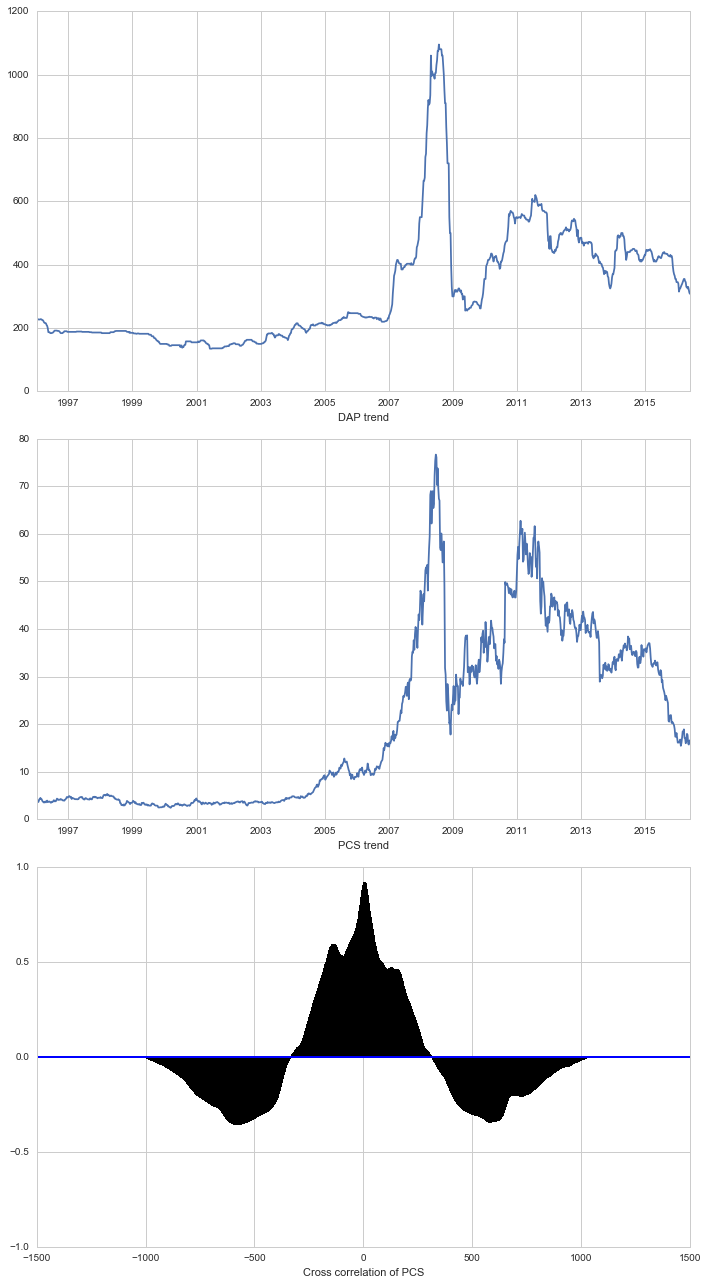

In [203]:
#DAP vs PCS comparison
import matplotlib.pyplot as plt
import numpy as np

#use for first two subplots
pcs1 = df_96on[['PCS_Stock']]
mosaic1 = df_96on[['Mosaic_Stock']]
DAP1 = df_96on[['DAP']]

#need in this format for bottom subplot
pcs = np.array(pcs1)
mosaic = np.array(mosaic1)
DAP = np.array(DAP1)
pcs = np.ravel(pcs) #said array was too deep before I did the ravel
DAP = np.ravel(DAP)
mosaic = np.ravel(mosaic)

total = sum(DAP)
av = total / len(DAP)
z = [i - av for i in DAP]

# Now let's generate random data for the same period
assert len(DAP) == len(pcs)

total1 = sum(pcs)
av1 = total1 / len(pcs)
z1 = [i - av1 for i in pcs]

fig = plt.figure(figsize=(10,18))
    
# Search trend 
ax1 = fig.add_subplot(311)
ax1.plot(DAP1)
ax1.set_xlabel('DAP trend')

# PCS: "search trend"
ax2 = fig.add_subplot(312)
ax2.plot(pcs1)
ax2.set_xlabel('PCS trend')

# Is there a pattern in search trend for this keyword?
ax3 = fig.add_subplot(313)
ax3.set_xlabel('Cross correlation of PCS')
ax3.xcorr(z,z1,usevlines=True, maxlags=None, normed=True, lw=2)
ax3.grid(True)
plt.ylim(-1, 1)

plt.tight_layout()

plt.show()
#highest correlation looks like it's around no lags

In [204]:
np.correlate(pcs,DAP,mode='full')

array([  1159.2812,   2372.6353,   3519.75  , ...,  11155.5   ,
         7579.86  ,   3811.1   ])

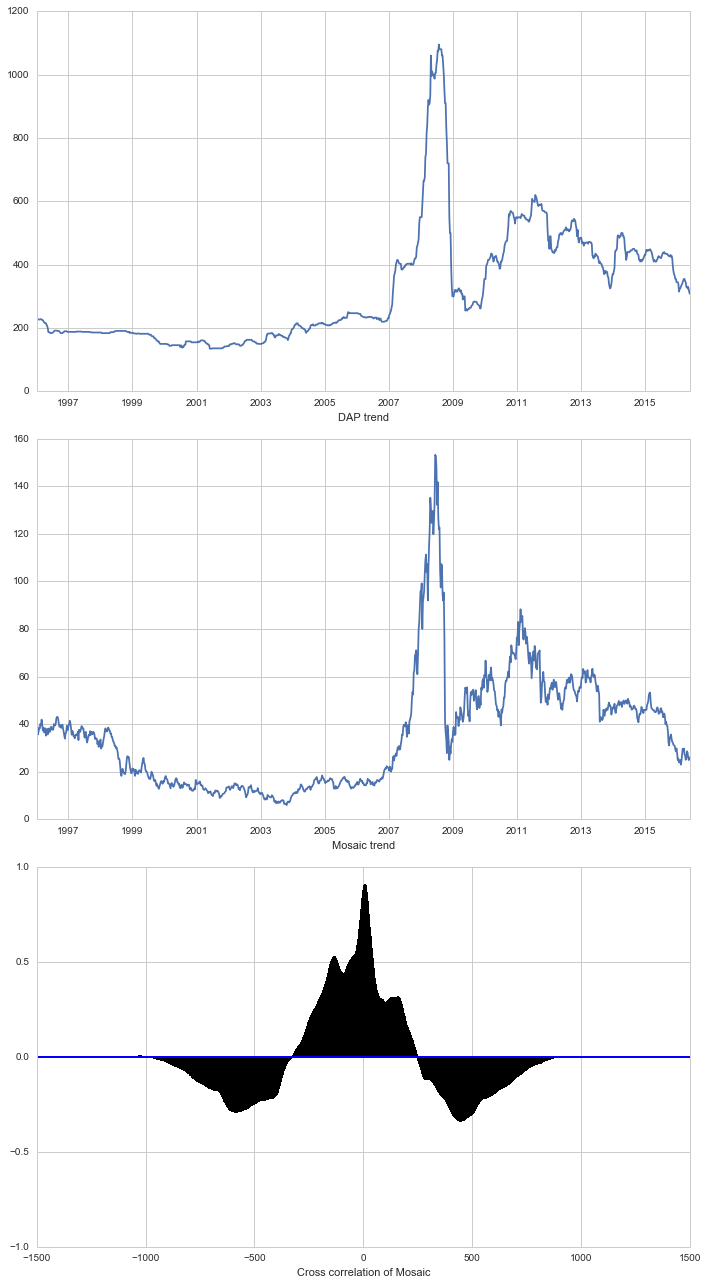

In [205]:
#mosaic vs DAP

total = sum(DAP)
av = total / len(DAP)
z = [i - av for i in DAP]

# Now let's generate random data for the same period

assert len(DAP) == len(mosaic)

total1 = sum(mosaic)
av1 = total1 / len(mosaic)
z1 = [i - av1 for i in mosaic]

fig = plt.figure(figsize=(10,18))

# Search trend volume
ax1 = fig.add_subplot(311)
ax1.plot(DAP1)
ax1.set_xlabel('DAP trend')

# Random: "search trend volume"
ax2 = fig.add_subplot(312)
ax2.plot(mosaic1)
ax2.set_xlabel('Mosaic trend')

# Is there a pattern in search trend for this keyword?
ax3 = fig.add_subplot(313)
ax3.set_xlabel('Cross correlation of Mosaic')
ax3.xcorr(z,z1,usevlines=True, maxlags=None, normed=True, lw=2)
ax3.grid(True)
plt.ylim(-1, 1)

plt.tight_layout()
plt.show()
#looks pretty close to pcs one so highest correlation when there is no lead or lag between the 2 variables

In [206]:
np.correlate(mosaic,DAP,mode='full')

array([ 12358.5  ,  24606.375,  36058.125, ...,  17484.84 ,  11823.52 ,
         5908.7  ])

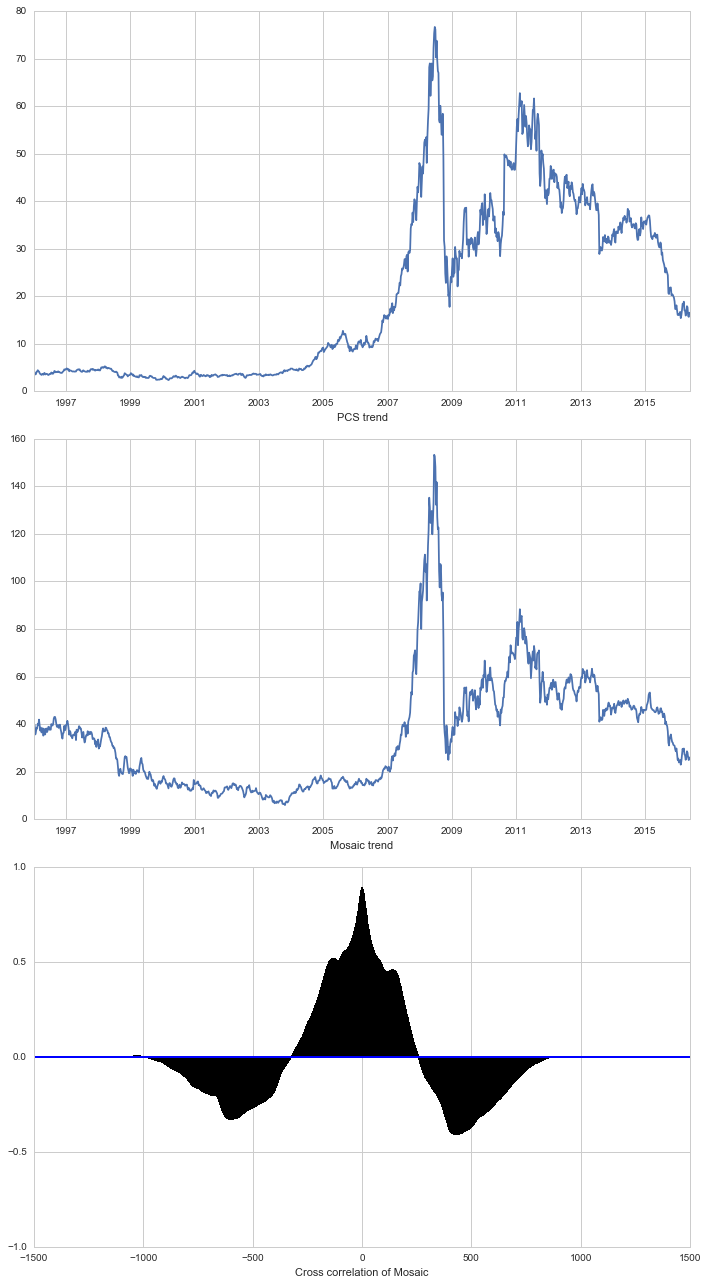

In [207]:
#both stocks vs each other
total = sum(pcs)
av = total / len(pcs)
z = [i - av for i in pcs]

# Now let's generate random data for the same period

assert len(pcs) == len(mosaic)

total1 = sum(mosaic)
av1 = total1 / len(mosaic)
z1 = [i - av1 for i in mosaic]

fig = plt.figure(figsize=(10,18))

# Search trend volume
ax1 = fig.add_subplot(311)
ax1.plot(pcs1)
ax1.set_xlabel('PCS trend')

# Random: "search trend volume"
ax2 = fig.add_subplot(312)
ax2.plot(mosaic1)
ax2.set_xlabel('Mosaic trend')

# Is there a pattern in search trend for this keyword?
ax3 = fig.add_subplot(313)
ax3.set_xlabel('Cross correlation of Mosaic')
ax3.xcorr(z,z1,usevlines=True, maxlags=None, normed=True, lw=2)
ax3.grid(True)
plt.ylim(-1, 1)

plt.tight_layout()

plt.show()
#again looks like best correlation at no lag or lead in the two variables

In [208]:
def lagcorr(x,y,lag=None,verbose=True):
    '''Compute lead-lag correlations between 2 time series.

    <x>,<y>: 1-D time series.
    <lag>: lag option, could take different forms of <lag>:
          if 0 or None, compute ordinary correlation and p-value;
          if positive integer, compute lagged correlation with lag
          upto <lag>;
          if negative integer, compute lead correlation with lead
          upto <-lag>;
          if pass in an list or tuple or array of integers, compute 
          lead/lag correlations at different leads/lags.

    Note: when talking about lead/lag, uses <y> as a reference.
    Therefore positive lag means <x> lags <y> by <lag>, computation is
    done by shifting <x> to the left hand side by <lag> with respect to
    <y>.
    Similarly negative lag means <x> leads <y> by <lag>, computation is
    done by shifting <x> to the right hand side by <lag> with respect to
    <y>.

    Return <result>: a (n*2) array, with 1st column the correlation 
    coefficients, 2nd column correpsonding p values.

    Currently only works for 1-D arrays.
    '''

    import numpy
    from scipy.stats import pearsonr

    if len(x)!=len(y):
        raise('Input variables of different lengths.')

    #--------Unify types of <lag>-------------
    if numpy.isscalar(lag):
        if abs(lag)>=len(x):
            raise('Maximum lag equal or larger than array.')
        if lag<0:
            lag=-numpy.arange(abs(lag)+1)
        elif lag==0:
            lag=[0,]
        else:
            lag=numpy.arange(lag+1)    
    elif lag is None:
        lag=[0,]
    else:
        lag=numpy.asarray(lag)

    #-------Loop over lags---------------------
    result=[]
    if verbose:
        print ('\n#<lagcorr>: Computing lagged-correlations at lags:',lag)

    for ii in lag:
        if ii<0:
            result.append(pearsonr(x[:ii],y[-ii:]))
        elif ii==0:
            result.append(pearsonr(x,y))
        elif ii>0:
            result.append(pearsonr(x[ii:],y[:-ii]))

    result=numpy.asarray(result)

    return result

In [209]:
x = pcs
y = DAP
# this has pcs starting at 0 and then it goes up to lead DAP to 50
lagcorr(x,y,lag=-50,verbose=True)
#lagcorr(x,y,lag=50,verbose=True) I did lag for pcs but nothing got better
#this shows pcs leads DAP by 7 weeks


#<lagcorr>: Computing lagged-correlations at lags: [  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50]


array([[  9.03067856e-001,   0.00000000e+000],
       [  9.08054583e-001,   0.00000000e+000],
       [  9.12301019e-001,   0.00000000e+000],
       [  9.15710865e-001,   0.00000000e+000],
       [  9.18117256e-001,   0.00000000e+000],
       [  9.19414904e-001,   0.00000000e+000],
       [  9.19962355e-001,   0.00000000e+000],
       [  9.19980348e-001,   0.00000000e+000],
       [  9.18907786e-001,   0.00000000e+000],
       [  9.16404871e-001,   0.00000000e+000],
       [  9.13564330e-001,   0.00000000e+000],
       [  9.09984226e-001,   0.00000000e+000],
       [  9.04992291e-001,   0.00000000e+000],
       [  8.98751434e-001,   0.00000000e+000],
       [  8.92150253e-001,   0.00000000e+000],
       [  8.85511098e-001,   0.00000000e+000],
       [  8.78365109e-001,   0.00000000e+000],
       [  8.71298609e-001,   0.00000000e+000],
       [  8.63621365e-001,   4.19434804e-313],
       [  8.55450889e-001,   1.31465282e-300],
       [  8.47220485e-001,   8.79060652e-289],
       [  8.3

In [210]:
x = mosaic
y = DAP
# this has mosaic starting at 0 and then it goes up to lead DAP to 50
lagcorr(x,y,lag=-50,verbose=True)
#lagcorr(x,y,lag=50,verbose=True) I did lag for pcs but nothing got better
#this shows mosaic leads DAP by 7 weeks


#<lagcorr>: Computing lagged-correlations at lags: [  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50]


array([[  8.75757036e-001,   0.00000000e+000],
       [  8.84494120e-001,   0.00000000e+000],
       [  8.92113836e-001,   0.00000000e+000],
       [  8.98428811e-001,   0.00000000e+000],
       [  9.03231346e-001,   0.00000000e+000],
       [  9.06235754e-001,   0.00000000e+000],
       [  9.08703438e-001,   0.00000000e+000],
       [  9.10042244e-001,   0.00000000e+000],
       [  9.09926973e-001,   0.00000000e+000],
       [  9.07731420e-001,   0.00000000e+000],
       [  9.05086838e-001,   0.00000000e+000],
       [  9.00773385e-001,   0.00000000e+000],
       [  8.94029110e-001,   0.00000000e+000],
       [  8.85540191e-001,   0.00000000e+000],
       [  8.76316941e-001,   0.00000000e+000],
       [  8.66863725e-001,   4.44520743e-319],
       [  8.56157164e-001,   1.71186845e-302],
       [  8.45809788e-001,   1.08171784e-287],
       [  8.34463624e-001,   1.06174584e-272],
       [  8.22203889e-001,   9.29700737e-258],
       [  8.09652459e-001,   1.27046897e-243],
       [  7.9

In [211]:
x = mosaic
y = pcs
# this has mosaic starting at 0 and then it goes up to lead pcs to 50
lagcorr(x,y,lag=-50,verbose=True)
#lagcorr(x,y,lag=50,verbose=True) I did lag for pcs but nothing got better
#this shows mosaic and pcs should have no lags or leads to each other


#<lagcorr>: Computing lagged-correlations at lags: [  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50]


array([[  8.92357595e-001,   0.00000000e+000],
       [  8.88765215e-001,   0.00000000e+000],
       [  8.84661404e-001,   0.00000000e+000],
       [  8.80684009e-001,   0.00000000e+000],
       [  8.75716330e-001,   0.00000000e+000],
       [  8.71210076e-001,   0.00000000e+000],
       [  8.67130196e-001,   3.16202013e-322],
       [  8.62533395e-001,   1.08933650e-314],
       [  8.56275986e-001,   5.79584008e-305],
       [  8.49662345e-001,   3.41547583e-295],
       [  8.41609978e-001,   5.60539820e-284],
       [  8.32927194e-001,   1.35786334e-272],
       [  8.24468246e-001,   4.08050993e-262],
       [  8.16388306e-001,   1.29235566e-252],
       [  8.08236144e-001,   1.67949009e-243],
       [  7.99611266e-001,   2.41988463e-234],
       [  7.90211335e-001,   6.95282058e-225],
       [  7.81566056e-001,   1.35730259e-216],
       [  7.73346910e-001,   4.72926550e-209],
       [  7.65654627e-001,   2.87076568e-202],
       [  7.58210584e-001,   6.02020699e-196],
       [  7.4

### looking at cross correlation graph it looks like the highest correlation is when the lag is at 0 so the original data time series should work best. But when not looking at graph mosaic and pcs lead DAP by 7 weeks

## Now I will have DAP 7 weeks up
[Top](#Table-of-Contents)

In [7]:
df_96on['DAP_up7weeks'] = df_96on.DAP.shift(-7) #aic chose this
df_96on.tail(8)

,DAP,PCS_Stock,Mosaic_Stock,DAP_up5weeks,DAP_up7weeks
2016-04-08,345,15.96,24.96,320,308
2016-04-15,330,16.42,26.11,311,NaN
2016-04-22,330,17.94,28.55,308,NaN
2016-04-29,325,17.72,27.99,NaN,NaN
2016-05-06,330,15.89,25.99,NaN,NaN
2016-05-13,320,15.69,24.84,NaN,NaN
2016-05-20,311,16.53,25.94,NaN,NaN
2016-05-27,308,16.57,25.69,NaN,NaN


In [213]:
df_96on.corr()

,DAP,PCS_Stock,Mosaic_Stock,DAP_up5weeks,DAP_up7weeks
DAP,1.000000,0.903068,0.875757,0.975983,0.957397
PCS_Stock,0.903068,1.000000,0.892358,0.919415,0.919980
Mosaic_Stock,0.875757,0.892358,1.000000,0.906236,0.910042
DAP_up5weeks,0.975983,0.919415,0.906236,1.000000,0.994306
DAP_up7weeks,0.957397,0.919980,0.910042,0.994306,1.000000


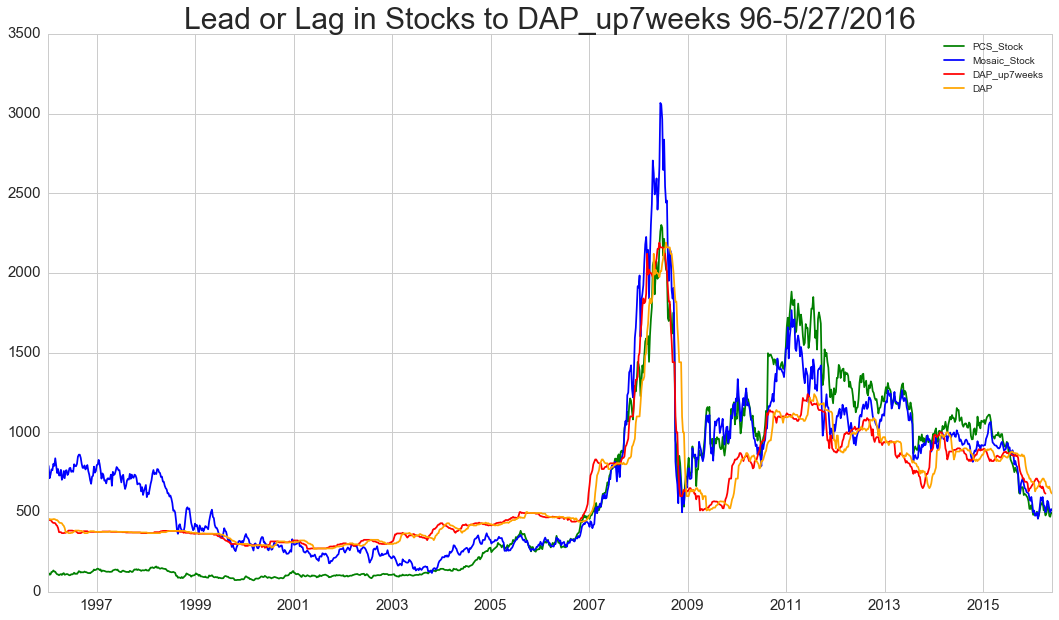

In [214]:
y1 = (df_96on['PCS_Stock'])*30
y2 = (df_96on['Mosaic_Stock'])*20
y3 = (df_96on['DAP_up7weeks'])*2
y4 = (df_96on['DAP'])*2
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
ax.plot(y1,'g')
ax.plot(y2,'b')
ax.plot(y3,'r')
ax.plot(y4,'orange')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Lead or Lag in Stocks to DAP_up7weeks 96-5/27/2016', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
plt.show()

In [8]:
df_96on3 = df_96on[0:1058]
df_96on3.tail()

,DAP,PCS_Stock,Mosaic_Stock,DAP_up5weeks,DAP_up7weeks
2016-03-11,350,18.26,28.70,330,325
2016-03-18,355,18.89,29.72,330,330
2016-03-25,355,17.08,27.26,325,320
2016-04-01,348,17.03,26.84,330,311
2016-04-08,345,15.96,24.96,320,308


In [9]:
#fit a OLS model with all, see how R^2 changes
import statsmodels.api as sm
X = df_96on3[['PCS_Stock','Mosaic_Stock']]
Y = df_96on3[['DAP_up7weeks']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
r_square = est.rsquared
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DAP_up7weeks   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     4071.
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        08:23:42   Log-Likelihood:                -5881.3
No. Observations:                1058   AIC:                         1.177e+04
Df Residuals:                    1055   BIC:                         1.178e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           92.4707      3.562     25.962      0.000        85.482    99.460
PCS_Stock        5.3722      0.234     22.921      0.000         4.912     5.832
Mosaic_Stock     3.3249      0.176     18.923      0.000         2.980     3.670
==============================================================================
Omnibus:                      151.988   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              714.439
Skew:                           0.578   Prob(JB):                    7.27e-156
Kurtosis:                       6.856   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
X = df_96on3[['PCS_Stock']]
Y = df_96on3[['DAP_up7weeks']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
r_square = est.rsquared
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DAP_up7weeks   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     5817.
Date:                Thu, 23 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:54:10   Log-Likelihood:                -6035.9
No. Observations:                1058   AIC:                         1.208e+04
Df Residuals:                    1056   BIC:                         1.209e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        132.5072      3.315     39.978      0.000       126.003   139.011
PCS_Stock      9.3304      0.122     76.272      0.000         9.090     9.570
==============================================================================
Omnibus:                      462.794   Durbin-Watson:                   0.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3834.774
Skew:                           1.806   Prob(JB):                         0.00
Kurtosis:                      11.599   Cond. No.                         40.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
X = df_96on3[['Mosaic_Stock']]
Y = df_96on3[['DAP_up7weeks']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
r_square = est.rsquared
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DAP_up7weeks   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     5090.
Date:                Thu, 23 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:54:27   Log-Likelihood:                -6095.0
No. Observations:                1058   AIC:                         1.219e+04
Df Residuals:                    1056   BIC:                         1.220e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           71.0620      4.205     16.900      0.000        62.811    79.313
Mosaic_Stock     6.9190      0.097     71.343      0.000         6.729     7.109
==============================================================================
Omnibus:                       14.611   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.900
Skew:                          -0.290   Prob(JB):                     0.000582
Kurtosis:                       3.051   Cond. No.                         77.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Could look at percent change in the stocks
[Top](#Table-of-Contents)

In [154]:
pcsseries = df_96on['PCS_Stock'] #needs to be in series format

def percentChange(startPoint,currentPoint):
    return((float(currentPoint)-startPoint)/abs(startPoint))*100.00

for eachN in pcsseries:
    pc = percentChange(pcsseries[0],eachN)
    print(pc)

0.0
3.69032120938
-4.98153510986
-3.13770291453
9.96307021972
10.8849863174
18.634926539
12.5454980207
11.623581923
2.95172560376
-2.58242780095
-4.05961901219
-7.74994022158
-3.87364170143
-1.84648901405
-6.4587263211
0.552618294854
3.69032120938
-5.35083291267
-3.32102340657
-1.47719121124
-1.84648901405
-4.79821461782
-8.30255851643
-6.82802412391
-2.21312999814
-3.50700071734
-0.369297802811
5.90345120752
-0.738595605622
1.47453439252
-0.738595605622
6.08942851829
14.5753075268
12.1762002179
7.01134461596
9.04115412205
8.30255851643
8.30255851643
12.5454980207
9.2244746141
9.2244746141
5.72013071548
3.87364170143
4.42891681501
3.1350460958
7.74994022158
11.2542841202
15.1279258216
23.6164616488
21.0340338479
21.5866521427
26.3822099418
28.7813172507
26.3822099418
20.6647360451
24.1690799437
12.5454980207
18.0796514254
17.1577353277
16.052498738
14.206009724
11.806902415
11.2542841202
12.1762002179
11.2542841202
10.5156885146
11.4376046122
11.623581923
18.634926539
20.6647360451
22.

In [155]:
mosaicseries = df_96on['Mosaic_Stock'] #needs to be in series format

def percentChange(startPoint,currentPoint):
    return((float(currentPoint)-startPoint)/abs(startPoint))*100.00

for eachN in mosaicseries:
    pc = percentChange(mosaicseries[0],eachN)
    print(pc)

0.0
-1.8691588785
-11.214953271
-8.41121495327
-4.36137071651
-4.98442367601
0.0
-1.55763239875
4.36137071651
-1.246105919
-7.16510903427
-4.04984423676
-9.03426791277
-9.03426791277
-4.67289719626
-12.46105919
-10.5919003115
-5.60747663551
-11.214953271
-5.29595015576
-4.98442367601
-8.72274143302
-7.16510903427
-3.42679127726
-3.11526479751
-6.23052959502
-5.60747663551
-6.23052959502
-0.311526479751
-1.55763239875
-1.8691588785
0.0
5.60747663551
7.16510903427
7.16510903427
4.67289719626
0.0
-3.11526479751
-3.11526479751
-1.246105919
-4.36137071651
-2.80373831776
-0.934579439252
-5.60747663551
-8.41121495327
-12.7725856698
-15.5763239875
-9.96884735202
-9.34579439252
-2.18068535826
-6.85358255452
-5.60747663551
-0.934579439252
-0.623052959502
3.11526479751
0.0
-4.98442367601
-11.5264797508
-7.47663551402
-8.72274143302
-13.0841121495
-12.7725856698
-15.2647975078
-11.8380062305
-11.214953271
-12.1495327103
-11.5264797508
-8.41121495327
-17.1339563863
-6.23052959502
-8.72274143302
-8.

In [ ]:
#can't figure out how to get in data frame right now so I will have to go back to the data later

# Exploratory Analysis, including the stock information, and no lead or lag
[Top](#Table-of-Contents)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
df_96on = data[['Date','Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock','DAP']]
print(df_96on.tail())
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

           Date  Urea     Phos_Inv  Phos_Exports  Phos_Domestic_Use  \
1060  4/29/2016   232  568570.4171   139477.8947         308862.647   
1061   5/6/2016   225  504721.1176   211180.0000         242143.957   
1062  5/13/2016   212  504721.1176   211180.0000         242143.957   
1063  5/20/2016   200  504721.1176   211180.0000         242143.957   
1064  5/27/2016   189  504721.1176   211180.0000         242143.957   

      PCS_Stock  Mosaic_Stock  DAP  
1060      17.72         27.99  325  
1061      15.89         25.99  330  
1062      15.69         24.84  320  
1063      16.53         25.94  311  
1064      16.57         25.69  308  


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Date                 datetime64[ns]
Urea                          int64
Phos_Inv                    float64
Phos_Exports                float64
Phos_Domestic_Use           float64
PCS_Stock                   float64
Mosaic_Stock                float64
DAP                           int64
dtype: object

In [222]:
df_96on.describe()

,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,PCS_Stock,Mosaic_Stock,DAP
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,259.853521,592872.991634,331393.061376,262331.544877,19.975336,35.785352,318.488263
std,135.468274,149325.503909,128496.751265,81424.770029,18.232960,24.331151,185.043178
min,83.000000,262900.000000,66943.220000,23156.400000,2.388900,5.900000,135.000000
25%,152.000000,482900.000000,235759.760000,211781.780000,3.730600,15.040000,184.000000
50%,240.000000,581000.000000,325936.420000,258685.232400,10.520000,33.937500,233.000000
75%,335.000000,687000.000000,421719.180000,310977.860000,35.020000,48.860000,430.000000
max,825.000000,960960.000000,741042.900000,639856.640000,76.696700,153.310000,1095.000000


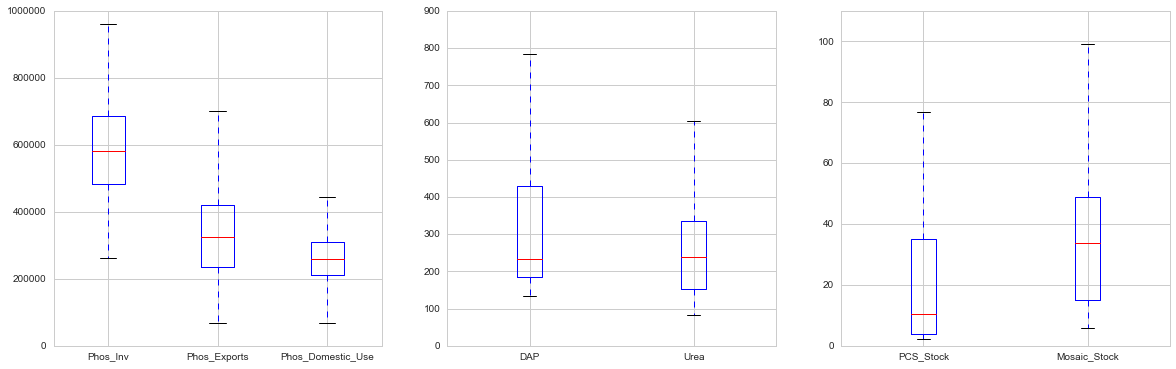

In [30]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
x1 = df_96on[['Phos_Inv']]
x2 = df_96on[['Phos_Exports']]
x3 = df_96on[['Phos_Domestic_Use']]
x4 = df_96on[['DAP']]
x5 = df_96on[['Urea']]
x6 = df_96on[['PCS_Stock']]
x7 = df_96on[['Mosaic_Stock']]
ax1.boxplot([x1,x2,x3])
ax1.set_xticklabels(['Phos_Inv','Phos_Exports','Phos_Domestic_Use'])
ax2.boxplot([x4,x5])
ax2.set_xticklabels(['DAP','Urea'])
ax2.set_ylim([0,900])
ax3.boxplot([x6,x7])
ax3.set_xticklabels(['PCS_Stock','Mosaic_Stock'])
ax3.set_ylim([0,110])
plt.show()
#domestic use look really normal

In [31]:
df_96on.corr()

,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,PCS_Stock,Mosaic_Stock,DAP
Urea,1.000000,-0.602952,-0.537962,-0.098647,0.872659,0.764810,0.892002
Phos_Inv,-0.602952,1.000000,0.354346,-0.164100,-0.608309,-0.463392,-0.482487
Phos_Exports,-0.537962,0.354346,1.000000,-0.070017,-0.588118,-0.382351,-0.516968
Phos_Domestic_Use,-0.098647,-0.164100,-0.070017,1.000000,-0.127828,-0.071931,-0.153365
PCS_Stock,0.872659,-0.608309,-0.588118,-0.127828,1.000000,0.892358,0.903068
Mosaic_Stock,0.764810,-0.463392,-0.382351,-0.071931,0.892358,1.000000,0.875757
DAP,0.892002,-0.482487,-0.516968,-0.153365,0.903068,0.875757,1.000000


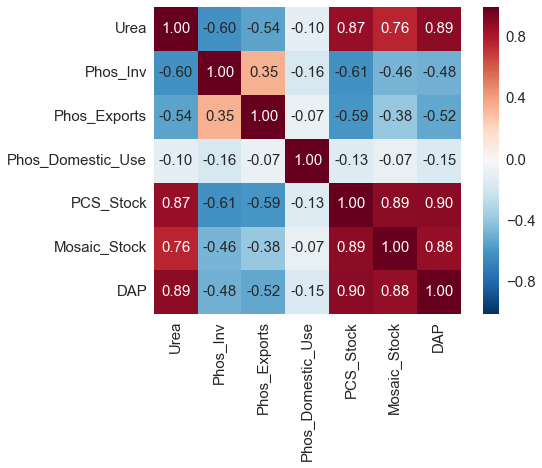

In [229]:
cols= ['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock','DAP']
cm = np.corrcoef(df_96on[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()
#urea corr to phos_inv, phos_exports, pcs_stock, mosaic stock, dap    #especially dap and pcs
#phos_inv corr to urea, pcs_stock
#phos_exports corr to urea, pcs stock, dap
#phos_domestic_use corr to nothing
#pcs_stock corr to all but phos_domestic                            #especially urea, mosaic, dap
#mosaic_stock corr to urea, pcs_stock, dap                               #especially pcs and dap
#dap corr to urea, phos_exports, pcs stock, mosaic stock              #especially to uream pcs stock, mosaic stock  

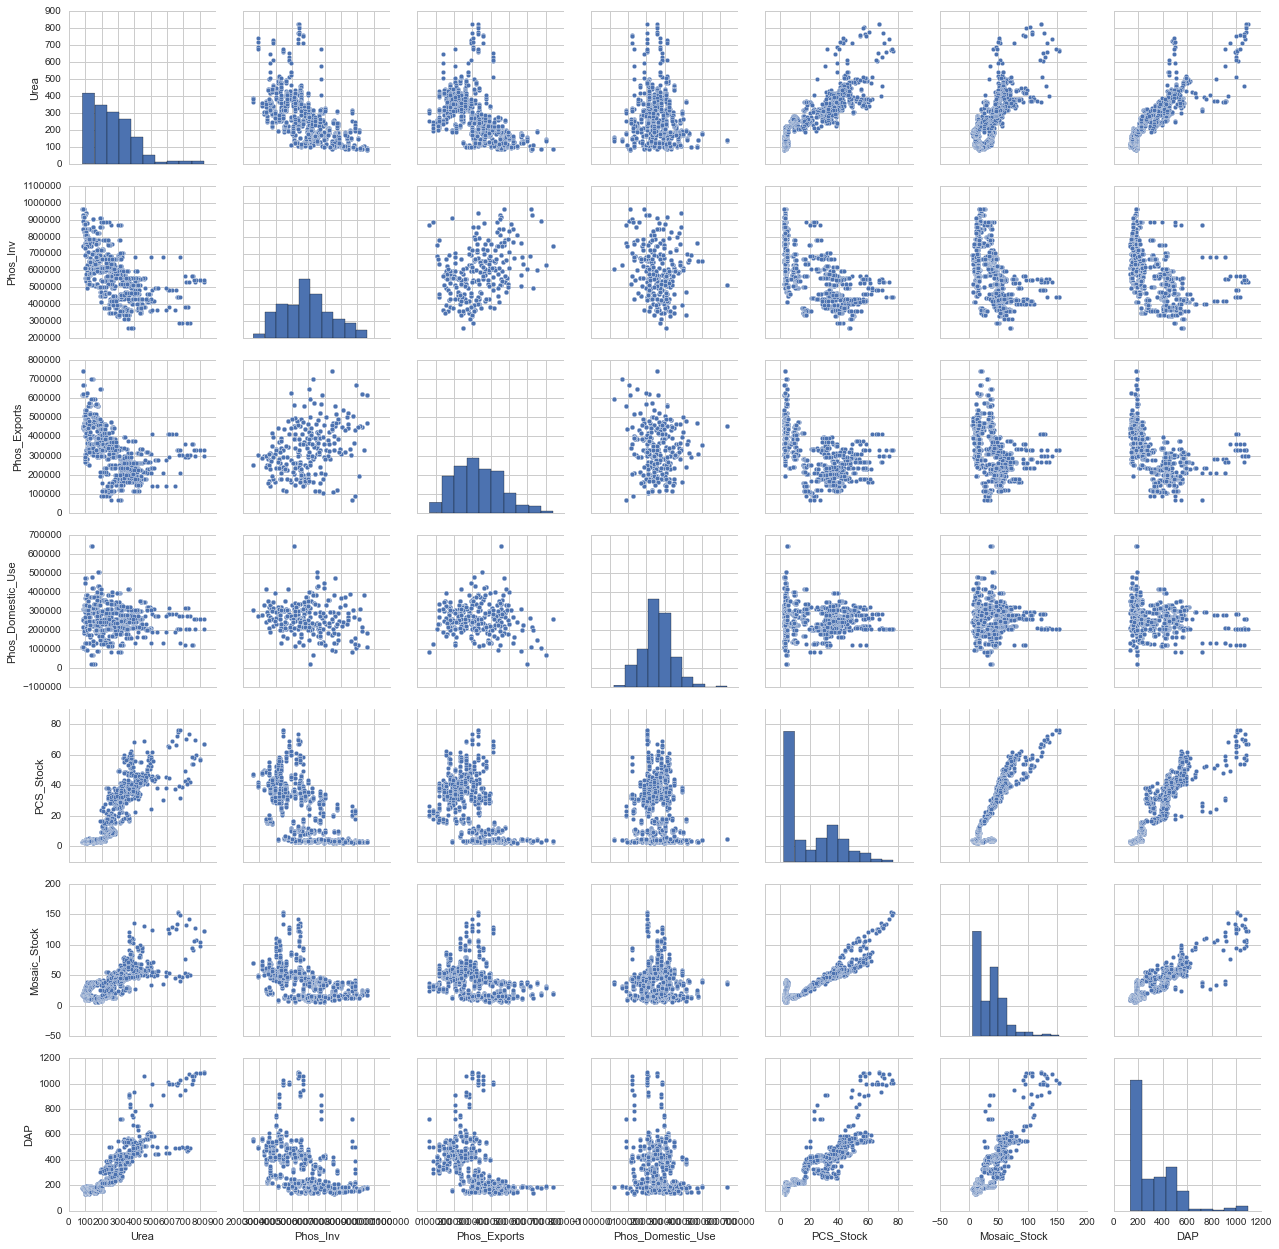

In [230]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df_96on, size=2.5);
plt.show()

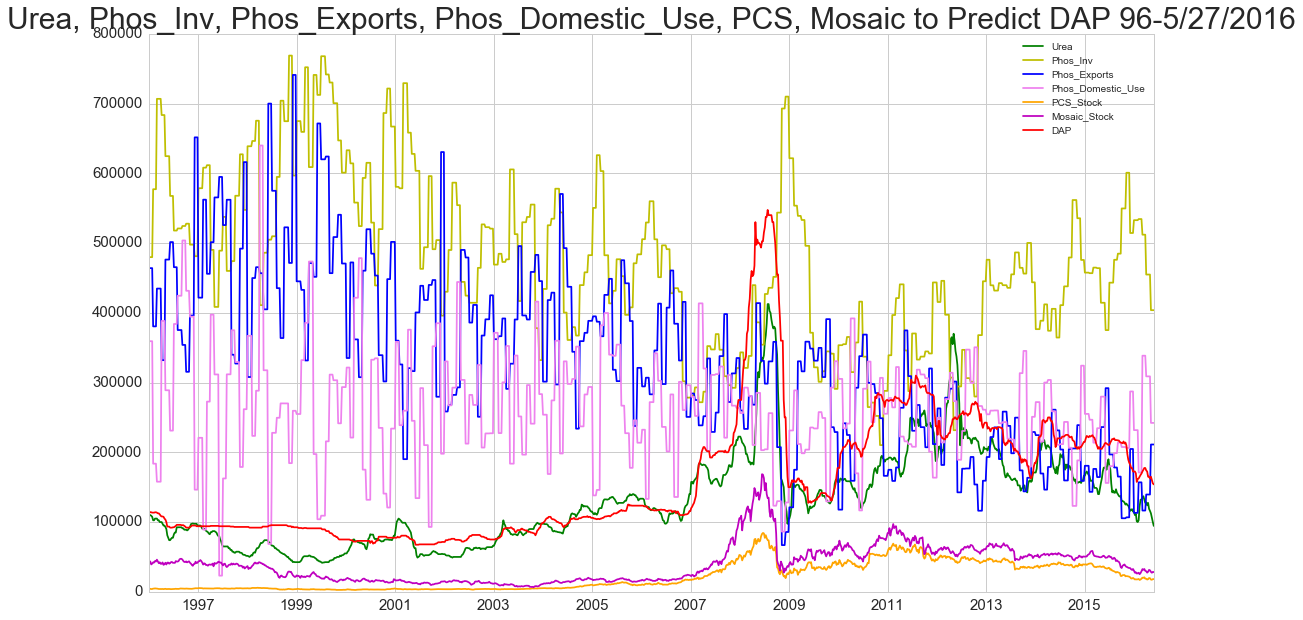

In [241]:
#trend, just modify to look at the different variables and scaling
x = date
y1 = (df_96on['Urea'])*500
y2 = (df_96on['Phos_Inv'])*0.8
y3 = (df_96on['Phos_Exports'])
y4 = (df_96on['Phos_Domestic_Use'])
y5 = (df_96on['PCS_Stock'])*1100
y6 = (df_96on['Mosaic_Stock'])*1100
y7 = (df_96on['DAP'])*500
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'y')
ax.plot(x,y3,'b')
ax.plot(x,y4,'violet')
ax.plot(x,y5,'orange')
ax.plot(x,y6,'m')
ax.plot(x,y7,'r')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Urea, Phos_Inv, Phos_Exports, Phos_Domestic_Use, PCS, Mosaic to Predict DAP 96-5/27/2016', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
plt.show()

## Determining MLR Models to Use, using stocks and no lead or lag
[Top](#Table-of-Contents)

In [11]:
#full model
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with all, see how R^2 changes
X = df_96on[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']]
Y = df_96on[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1590.
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        08:24:14   Log-Likelihood:                -5843.6
No. Observations:                1065   AIC:                         1.170e+04
Df Residuals:                    1058   BIC:                         1.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                -6.4172     19.853     -0.323      0.747       -45.372    32.538
Urea                  0.6610      0.028     23.825      0.000         0.607     0.715
Phos_Inv              0.0001   1.72e-05      6.841      0.000      8.38e-05     0.000
Phos_Exports      -7.778e-05   1.98e-05     -3.931      0.000        -0.000  -3.9e-05
Phos_Domestic_Use    -0.0001   2.49e-05     -4.218      0.000        -0.000 -5.61e-05
PCS_Stock             1.5811      0.366      4.319      0.000         0.863     2.300
Mosaic_Stock          2.9399      0.191     15.395      0.000         2.565     3.315
==============================================================================
Omnibus:                      322.108   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2352.813
Skew:                           1.189   Prob(JB):                         0.00
Kurtosis:                       9.883   Cond. No.                     8.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#scikit learn using training and test
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import numpy as np 
X = df_96on[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']].values
y = df_96on['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

regr = LinearRegression()
regr.fit(X_train,y_train) #should use X_train and y_train
LinearRegression(fit_intercept=True)
print (regr.coef_)
print(regr.intercept_)
# The mean square error
print(np.mean((regr.predict(X_test) - y_test)**2))
#explained variance score: 1 is perfect prediction
regr.score(X_test,y_test)

[  6.92015298e-01   1.21696932e-04  -6.37269176e-05  -9.80476109e-05
   1.33669896e+00   3.05779010e+00]
-22.9115034133
2962.17641015


0.90527610734696295

In [12]:
data = df_96on[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']]
response = df_96on['DAP'] # need to have in the series format
Y = np.array(Y)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats.stats import pearsonr
import numpy as np
from statsmodels import regression
import math
#forward stepwise regression formula
def forward_aic(response, data):
    # This function will work with pandas dataframes and series
    
    # Initialize some variables
    explanatory = list(data.columns)
    selected = pd.Series(np.ones(data.shape[0]), name="Intercept")
    current_score, best_new_score = np.inf, np.inf
    
    # Loop while we haven't found a better model
    while current_score == best_new_score and len(explanatory) != 0:
        
        scores_with_elements = []
        count = 0
        
        # For each explanatory variable
        for element in explanatory:
            # Make a set of explanatory variables including our current best and the new one
            tmp = pd.concat([selected, data[element]], axis=1)
            # Test the set
            result = regression.linear_model.OLS(Y, tmp).fit()
            score = result.aic
            scores_with_elements.append((score, element, count))
            count += 1
        
        # Sort the scoring list
        scores_with_elements.sort(reverse = True)
        # Get the best new variable
        best_new_score, best_element, index = scores_with_elements.pop()
        if current_score > best_new_score:
            # If it's better than the best add it to the set
            explanatory.pop(index)
            selected = pd.concat([selected, data[best_element]],axis=1)
            current_score = best_new_score
    # Return the final model
    model = regression.linear_model.OLS(Y, selected).fit()
    return model

In [14]:
#results of stepwise regression 
result = forward_aic(Y, data)
result.summary()
#kept all 6 variables however phos_exports and phos_domestic_use least important

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1590.
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        08:24:35   Log-Likelihood:                -5843.6
No. Observations:                1065   AIC:                         1.170e+04
Df Residuals:                    1058   BIC:                         1.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -6.4172     19.853     -0.323      0.747       -45.372    32.538
PCS_Stock             1.5811      0.366      4.319      0.000         0.863     2.300
Urea                  0.6610      0.028     23.825      0.000         0.607     0.715
Mosaic_Stock          2.9399      0.191     15.395      0.000         2.565     3.315
Phos_Inv              0.0001   1.72e-05      6.841      0.000      8.38e-05     0.000
Phos_Domestic_Use    -0.0001   2.49e-05     -4.218      0.000        -0.000 -5.61e-05
Phos_Exports      -7.778e-05   1.98e-05     -3.931      0.000        -0.000  -3.9e-05
==============================================================================
Omnibus:                      322.108   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2352.813
Skew:                           1.189   Prob(JB):                         0.00
Kurtosis:                       9.883   Cond. No.                     8.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [259]:
#now get rid of exports since least important and see what changes
X = df_96on[['Urea','Phos_Inv','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']]
Y = df_96on[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() 
#doesn't seem to change much at all

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1879.
Date:                Thu, 23 Jun 2016   Prob (F-statistic):               0.00
Time:                        14:17:57   Log-Likelihood:                -5851.3
No. Observations:                1065   AIC:                         1.171e+04
Df Residuals:                    1059   BIC:                         1.174e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const               -53.2240     15.993     -3.328      0.001       -84.605   -21.843
Urea                  0.6689      0.028     24.009      0.000         0.614     0.724
Phos_Inv              0.0001   1.69e-05      7.784      0.000      9.84e-05     0.000
Phos_Domestic_Use -7.621e-05   2.39e-05     -3.185      0.001        -0.000 -2.93e-05
PCS_Stock             2.3415      0.313      7.482      0.000         1.727     2.956
Mosaic_Stock          2.6019      0.172     15.156      0.000         2.265     2.939
==============================================================================
Omnibus:                      336.889   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2687.756
Skew:                           1.226   Prob(JB):                         0.00
Kurtosis:                      10.386   Cond. No.                     5.86e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [260]:
#now get rid of exports and domestic since both least important and see what changes
X = df_96on[['Urea','Phos_Inv','PCS_Stock','Mosaic_Stock']]
Y = df_96on[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() 
#doesn't seem to change much at all

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     2326.
Date:                Thu, 23 Jun 2016   Prob (F-statistic):               0.00
Time:                        14:19:28   Log-Likelihood:                -5856.4
No. Observations:                1065   AIC:                         1.172e+04
Df Residuals:                    1060   BIC:                         1.175e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          -85.8651     12.330     -6.964      0.000      -110.060   -61.670
Urea             0.6715      0.028     24.009      0.000         0.617     0.726
Phos_Inv         0.0001    1.6e-05      9.372      0.000         0.000     0.000
PCS_Stock        2.5723      0.306      8.412      0.000         1.972     3.172
Mosaic_Stock     2.5067      0.170     14.764      0.000         2.174     2.840
==============================================================================
Omnibus:                      354.441   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2978.576
Skew:                           1.287   Prob(JB):                         0.00
Kurtosis:                      10.778   Cond. No.                     4.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [257]:
# lasso regression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

X = df_96on[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']].values
y = df_96on['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)


alpha = 0.6  #the higher this gets the less features chosen
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
print (lasso)
print ("r^2 on test data : %f" % (1 - np.linalg.norm(y_test - y_pred_lasso)**2
                                      / np.linalg.norm(y_test)**2))
print(lasso.coef_)
print(lasso.intercept_)

Lasso(alpha=0.6, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.977168
[  6.92664498e-01   1.21394835e-04  -6.41379798e-05  -9.83991672e-05
   1.32282801e+00   3.06156575e+00]
-22.5304962425


In [37]:
#rfecv choice
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV

X = df_96on[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']]
Y = df_96on[['DAP']]
#order is above
regression = LinearRegression()
selector = RFECV(estimator=regression, cv=10,
   scoring='mean_squared_error')
selector.fit(X, Y)

sfm = SelectFromModel(regression, threshold = 0.25)
print("Optimal number of features: %d" 
   % selector.n_features_)
print ([selector.support_])
print(selector.ranking_)
print(selector) #most important are urea, pcs_stock, and mosaic
#exports least important followed by domestic use

Optimal number of features: 3
[array([ True, False, False, False,  True,  True], dtype=bool)]
[1 2 4 3 1 1]
RFECV(cv=10,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   estimator_params=None, scoring='mean_squared_error', step=1, verbose=0)


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [261]:
#now try using rfecv results
X = df_96on[['Urea','PCS_Stock','Mosaic_Stock']]
Y = df_96on[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     2840.
Date:                Thu, 23 Jun 2016   Prob (F-statistic):               0.00
Time:                        14:20:40   Log-Likelihood:                -5898.7
No. Observations:                1065   AIC:                         1.181e+04
Df Residuals:                    1061   BIC:                         1.183e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           19.7647      5.201      3.801      0.000         9.560    29.969
Urea             0.6252      0.029     21.834      0.000         0.569     0.681
PCS_Stock        1.7209      0.304      5.667      0.000         1.125     2.317
Mosaic_Stock     2.8474      0.172     16.508      0.000         2.509     3.186
==============================================================================
Omnibus:                      421.298   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4161.109
Skew:                           1.536   Prob(JB):                         0.00
Kurtosis:                      12.184   Cond. No.                         818.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### summary from the MLR models

# RDF Analysis, using stocks, no lead or lag
[Top](#Table-of-Contents)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_96on[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']].values
y = df_96on['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [16]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on dap/map data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [266]:
#do multiple times to see what parameters are the best
rdf_model_dapall = fit_predict_model(X_train,y_train)
print (rdf_model_dapall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


## Model 1 = All Variables Used (forward selection)

In [40]:
X1 = df_96on[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']].values
y1 = df_96on['DAP'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_) #urea most important followed by stocks, exports least important

MSE train: 143.758, test: 553.924
R^2 train: 0.996, test: 0.982
[ 0.54656704  0.01219963  0.01097478  0.02399504  0.1968469   0.2094166 ]


## Model 2 = Top 3 (RFECV and top in RDF)

In [41]:
#top 3
X = df_96on[['Urea','PCS_Stock','Mosaic_Stock']].values
y = df_96on['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [272]:
rdf_model_daptop3 = fit_predict_model(X_train,y_train)
print (rdf_model_daptop3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [42]:
X2 = df_96on[['Urea','PCS_Stock','Mosaic_Stock']].values
y2 = df_96on['DAP'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 308.300, test: 944.831
R^2 train: 0.991, test: 0.970
[ 0.57045096  0.20053752  0.22901152]


## Model 3 = Top 4 

In [43]:
#top 4
X = df_96on[['Urea','Phos_Inv','PCS_Stock','Mosaic_Stock']].values
y = df_96on['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [278]:
rdf_model_daptop4 = fit_predict_model(X_train,y_train)
print (rdf_model_daptop4.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [44]:
X3 = df_96on[['Urea','Phos_Inv','PCS_Stock','Mosaic_Stock']].values
y3 = df_96on['DAP'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 159.816, test: 785.050
R^2 train: 0.995, test: 0.975
[ 0.54227824  0.03208067  0.21373079  0.2119103 ]


## Model 4 = Excluding exports

In [45]:
X = df_96on[['Urea','Phos_Inv','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']].values
y = df_96on['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [284]:
rdf_model_dapnoexport = fit_predict_model(X_train,y_train)
print (rdf_model_dapnoexport.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [46]:
X4 = df_96on[['Urea','Phos_Inv','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']].values
y4 = df_96on['DAP'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 156.269, test: 522.105
R^2 train: 0.996, test: 0.983
[ 0.5740079   0.01637798  0.02490327  0.17137769  0.21333316]


## Model 5 = no x variables correlated to each other

In [47]:
X = df_96on[['Phos_Inv','Phos_Exports','Phos_Domestic_Use','Mosaic_Stock']].values
y = df_96on['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [293]:
rdf_model_dapnocorr = fit_predict_model(X_train,y_train)
print (rdf_model_dapnocorr.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [49]:
X5 = df_96on[['Phos_Inv','Phos_Exports','Phos_Domestic_Use','Mosaic_Stock']].values
y5 = df_96on['DAP'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 367.894, test: 778.226
R^2 train: 0.990, test: 0.975
[ 0.04717708  0.10341998  0.03919621  0.81020673]


# Exploratory Analysis with Stocks Leading DAP by 7 Weeks
[Top](#Table-of-Contents)

In [58]:
df_96on['DAP_up7weeks'] = df_96on.DAP.shift(-7) #aic chose this
df_96on7 = df_96on[['Date','Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock','DAP_up7weeks']][0:1058]
df_96on7.tail(2)

,Date,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,PCS_Stock,Mosaic_Stock,DAP_up7weeks
1056,2016-04-01,257,568570.4171,139477.8947,308862.647,17.03,26.84,311
1057,2016-04-08,248,568570.4171,139477.8947,308862.647,15.96,24.96,308


In [60]:
df_96on7.corr()

,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,PCS_Stock,Mosaic_Stock,DAP_up7weeks
Urea,1.000000,-0.604522,-0.542735,-0.098887,0.872707,0.764710,0.868658
Phos_Inv,-0.604522,1.000000,0.353517,-0.164595,-0.609335,-0.465036,-0.563510
Phos_Exports,-0.542735,0.353517,1.000000,-0.068850,-0.592395,-0.387329,-0.495298
Phos_Domestic_Use,-0.098887,-0.164595,-0.068850,1.000000,-0.127879,-0.071851,-0.101630
PCS_Stock,0.872707,-0.609335,-0.592395,-0.127879,1.000000,0.892430,0.919980
Mosaic_Stock,0.764710,-0.465036,-0.387329,-0.071851,0.892430,1.000000,0.910042
DAP_up7weeks,0.868658,-0.563510,-0.495298,-0.101630,0.919980,0.910042,1.000000


## MLR Models First

In [59]:
X = df_96on7[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']]
Y = df_96on7[['DAP_up7weeks']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DAP_up7weeks   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1733.
Date:                Fri, 24 Jun 2016   Prob (F-statistic):               0.00
Time:                        08:59:17   Log-Likelihood:                -5763.6
No. Observations:                1058   AIC:                         1.154e+04
Df Residuals:                    1051   BIC:                         1.158e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const               101.3393     19.267      5.260      0.000        63.533   139.145
Urea                  0.3972      0.027     14.869      0.000         0.345     0.450
Phos_Inv          -5.251e-05   1.66e-05     -3.169      0.002      -8.5e-05    -2e-05
Phos_Exports      -3.705e-05   1.92e-05     -1.928      0.054     -7.48e-05  6.49e-07
Phos_Domestic_Use -5.232e-05   2.39e-05     -2.185      0.029     -9.93e-05 -5.34e-06
PCS_Stock             1.8165      0.353      5.151      0.000         1.125     2.508
Mosaic_Stock          3.7746      0.184     20.544      0.000         3.414     4.135
==============================================================================
Omnibus:                      296.687   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2171.513
Skew:                           1.085   Prob(JB):                         0.00
Kurtosis:                       9.675   Cond. No.                     8.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
#forward selection stepwise, I already executed definition in above section
data = df_96on7[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']]
response = df_96on7['DAP_up7weeks'] # need to have in the series format
Y = np.array(Y)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats.stats import pearsonr
import numpy as np
from statsmodels import regression
import math
#forward stepwise regression formula
def forward_aic(response, data):
    # This function will work with pandas dataframes and series
    
    # Initialize some variables
    explanatory = list(data.columns)
    selected = pd.Series(np.ones(data.shape[0]), name="Intercept")
    current_score, best_new_score = np.inf, np.inf
    
    # Loop while we haven't found a better model
    while current_score == best_new_score and len(explanatory) != 0:
        
        scores_with_elements = []
        count = 0
        
        # For each explanatory variable
        for element in explanatory:
            # Make a set of explanatory variables including our current best and the new one
            tmp = pd.concat([selected, data[element]], axis=1)
            # Test the set
            result = regression.linear_model.OLS(Y, tmp).fit()
            score = result.aic
            scores_with_elements.append((score, element, count))
            count += 1
        
        # Sort the scoring list
        scores_with_elements.sort(reverse = True)
        # Get the best new variable
        best_new_score, best_element, index = scores_with_elements.pop()
        if current_score > best_new_score:
            # If it's better than the best add it to the set
            explanatory.pop(index)
            selected = pd.concat([selected, data[best_element]],axis=1)
            current_score = best_new_score
    # Return the final model
    model = regression.linear_model.OLS(Y, selected).fit()
    return model
result = forward_aic(Y, data)
result.summary()
#now mosaic is more important than urea, so the lead of the stocks changed only that

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1733.
Date:                Fri, 24 Jun 2016   Prob (F-statistic):               0.00
Time:                        09:08:20   Log-Likelihood:                -5763.6
No. Observations:                1058   AIC:                         1.154e+04
Df Residuals:                    1051   BIC:                         1.158e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept           101.3393     19.267      5.260      0.000        63.533   139.145
PCS_Stock             1.8165      0.353      5.151      0.000         1.125     2.508
Mosaic_Stock          3.7746      0.184     20.544      0.000         3.414     4.135
Urea                  0.3972      0.027     14.869      0.000         0.345     0.450
Phos_Inv          -5.251e-05   1.66e-05     -3.169      0.002      -8.5e-05    -2e-05
Phos_Domestic_Use -5.232e-05   2.39e-05     -2.185      0.029     -9.93e-05 -5.34e-06
Phos_Exports      -3.705e-05   1.92e-05     -1.928      0.054     -7.48e-05  6.49e-07
==============================================================================
Omnibus:                      296.687   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2171.513
Skew:                           1.085   Prob(JB):                         0.00
Kurtosis:                       9.675   Cond. No.                     8.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
#no exports since least important
X = df_96on7[['Urea','Phos_Inv','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']]
Y = df_96on7[['DAP_up7weeks']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#pretty much same as including all variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DAP_up7weeks   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     2073.
Date:                Fri, 24 Jun 2016   Prob (F-statistic):               0.00
Time:                        09:10:19   Log-Likelihood:                -5765.4
No. Observations:                1058   AIC:                         1.154e+04
Df Residuals:                    1052   BIC:                         1.157e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                78.8123     15.342      5.137      0.000        48.709   108.916
Urea                  0.4011      0.027     15.043      0.000         0.349     0.453
Phos_Inv          -4.558e-05   1.62e-05     -2.815      0.005     -7.74e-05 -1.38e-05
Phos_Domestic_Use -3.867e-05   2.29e-05     -1.688      0.092     -8.36e-05  6.27e-06
PCS_Stock             2.1771      0.299      7.273      0.000         1.590     2.764
Mosaic_Stock          3.6149      0.164     22.011      0.000         3.293     3.937
==============================================================================
Omnibus:                      300.916   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2264.669
Skew:                           1.095   Prob(JB):                         0.00
Kurtosis:                       9.825   Cond. No.                     5.86e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
#no exports or domestic usage since least important, this changed nothing so only kept top 3 now
X = df_96on7[['Urea','PCS_Stock','Mosaic_Stock']]
Y = df_96on7[['DAP_up7weeks']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DAP_up7weeks   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     3431.
Date:                Fri, 24 Jun 2016   Prob (F-statistic):               0.00
Time:                        09:13:50   Log-Likelihood:                -5769.7
No. Observations:                1058   AIC:                         1.155e+04
Df Residuals:                    1054   BIC:                         1.157e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           36.5496      4.787      7.634      0.000        27.156    45.944
Urea             0.4138      0.026     15.732      0.000         0.362     0.465
PCS_Stock        2.4991      0.279      8.955      0.000         1.952     3.047
Mosaic_Stock     3.4847      0.159     21.983      0.000         3.174     3.796
==============================================================================
Omnibus:                      318.066   Durbin-Watson:                   0.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2393.086
Skew:                           1.170   Prob(JB):                         0.00
Kurtosis:                       9.986   Cond. No.                         818.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#rfecv
X = df_96on7[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']]
Y = df_96on7[['DAP_up7weeks']]
#order is above
regression = LinearRegression()
selector = RFECV(estimator=regression, cv=10,
   scoring='mean_squared_error')
selector.fit(X, Y)

sfm = SelectFromModel(regression, threshold = 0.25)
print("Optimal number of features: %d" 
   % selector.n_features_)
print ([selector.support_])
print(selector.ranking_)
print(selector) #same choice as when there was no lead, analysis above

Optimal number of features: 3
[array([ True, False, False, False,  True,  True], dtype=bool)]
[1 2 4 3 1 1]
RFECV(cv=10,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   estimator_params=None, scoring='mean_squared_error', step=1, verbose=0)


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
#no corr to each other
X = df_96on7[['Phos_Inv','Phos_Exports','Phos_Domestic_Use','Mosaic_Stock']]
Y = df_96on7[['DAP_up7weeks']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DAP_up7weeks   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1848.
Date:                Fri, 24 Jun 2016   Prob (F-statistic):               0.00
Time:                        09:19:44   Log-Likelihood:                -5925.4
No. Observations:                1058   AIC:                         1.186e+04
Df Residuals:                    1053   BIC:                         1.189e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const               351.8790     15.515     22.679      0.000       321.434   382.324
Phos_Inv             -0.0002   1.59e-05    -13.106      0.000        -0.000    -0.000
Phos_Exports         -0.0002   1.75e-05    -11.832      0.000        -0.000    -0.000
Phos_Domestic_Use    -0.0002   2.55e-05     -7.480      0.000        -0.000    -0.000
Mosaic_Stock          5.8556      0.099     59.363      0.000         5.662     6.049
==============================================================================
Omnibus:                       46.558   Durbin-Watson:                   0.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.775
Skew:                           0.098   Prob(JB):                     3.29e-30
Kurtosis:                       4.744   Cond. No.                     5.72e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## RDF analysis, stocks included 7 week lead in stocks
[Top](#Table-of-Contents)

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_96on7[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']].values
y = df_96on7['DAP_up7weeks'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [72]:
#do multiple times to see what parameters are the best
rdf_model_dapall = fit_predict_model(X_train,y_train)
print (rdf_model_dapall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


## Model 1 = All variables

In [82]:
X1_7 = df_96on7[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']].values
y1_7 = df_96on7['DAP_up7weeks'].values
X_train1_7, X_test1_7, y_train1_7, y_test1_7= train_test_split(X1_7,y1_7,test_size=0.3,random_state=1)
forest1_7 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1_7.fit(X_train1_7, y_train1_7)
y_train_pred1_7= forest1_7.predict(X_train1_7)
y_test_pred1_7= forest1_7.predict(X_test1_7)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1_7, y_train_pred1_7),mean_squared_error(y_test1_7, y_test_pred1_7)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1_7, y_train_pred1_7),r2_score(y_test1_7,y_test_pred1_7)))
print(forest1_7.feature_importances_) #urea is still most important however not as much as before

MSE train: 93.287, test: 297.695
R^2 train: 0.997, test: 0.992
[ 0.41191478  0.01034609  0.00722177  0.0047414   0.32886502  0.23691094]


## Model 2 = RFECV/ Top 3

In [79]:
#top 3
X = df_96on7[['Urea','PCS_Stock','Mosaic_Stock']].values
y = df_96on7['DAP_up7weeks'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [80]:
rdf_model_daptop3 = fit_predict_model(X_train,y_train)
print (rdf_model_daptop3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [90]:
X2_7 = df_96on7[['Urea','PCS_Stock','Mosaic_Stock']].values
y2_7 = df_96on7['DAP_up7weeks'].values
X_train2_7, X_test2_7, y_train2_7, y_test2_7 = train_test_split(X2_7,y2_7,test_size=0.3,random_state=1)
forest2_7 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2_7.fit(X_train2_7, y_train2_7)
y_train_pred2_7 = forest2_7.predict(X_train2_7)
y_test_pred2_7 = forest2_7.predict(X_test2_7)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2_7, y_train_pred2_7),mean_squared_error(y_test2_7, y_test_pred2_7)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2_7, y_train_pred2_7),r2_score(y_test2_7,y_test_pred2_7)))
print(forest2_7.feature_importances_)

MSE train: 274.484, test: 629.464
R^2 train: 0.992, test: 0.984
[ 0.43069105  0.32760086  0.24170809]


## Model 3 = Top4

In [91]:
#top 4
X = df_96on7[['Urea','Phos_Inv','PCS_Stock','Mosaic_Stock']].values
y = df_96on7['DAP_up7weeks'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [92]:
rdf_model_daptop4 = fit_predict_model(X_train,y_train)
print (rdf_model_daptop4.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [93]:
X3_7 = df_96on7[['Urea','Phos_Inv','PCS_Stock','Mosaic_Stock']].values
y3_7 = df_96on7['DAP_up7weeks'].values
X_train3_7, X_test3_7, y_train3_7, y_test3_7 = train_test_split(X3_7,y3_7,test_size=0.3,random_state=1)
forest3_7 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3_7.fit(X_train3_7, y_train3_7)
y_train_pred3_7 = forest3_7.predict(X_train3_7)
y_test_pred3_7 = forest3_7.predict(X_test3_7)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3_7, y_train_pred3_7),mean_squared_error(y_test3_7, y_test_pred3_7)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3_7, y_train_pred3_7),r2_score(y_test3_7,y_test_pred3_7)))
print(forest3_7.feature_importances_)

MSE train: 146.897, test: 380.028
R^2 train: 0.995, test: 0.990
[ 0.44138554  0.01427159  0.3091494   0.23519347]


## Model 4 = excluding exports

In [94]:
X = df_96on7[['Urea','Phos_Inv','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']].values
y = df_96on7['DAP_up7weeks'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [99]:
rdf_model_dapnoexport = fit_predict_model(X_train,y_train)
print (rdf_model_dapnoexport.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [100]:
X4_7 = df_96on7[['Urea','Phos_Inv','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']].values
y4_7 = df_96on7['DAP_up7weeks'].values
X_train4_7, X_test4_7, y_train4_7, y_test4_7 = train_test_split(X4_7,y4_7,test_size=0.3,random_state=1)
forest4_7 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4_7.fit(X_train4_7, y_train4_7)
y_train_pred4_7 = forest4_7.predict(X_train4_7)
y_test_pred4_7 = forest4_7.predict(X_test4_7)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4_7, y_train_pred4_7),mean_squared_error(y_test4_7, y_test_pred4_7)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4_7, y_train_pred4_7),r2_score(y_test4_7,y_test_pred4_7)))
print(forest4_7.feature_importances_)

MSE train: 103.404, test: 348.042
R^2 train: 0.997, test: 0.991
[ 0.42424481  0.01293284  0.0053972   0.32618477  0.23124039]


## Model 5 = no correlation between x variables

In [101]:
X = df_96on7[['Phos_Inv','Phos_Exports','Phos_Domestic_Use','Mosaic_Stock']].values
y = df_96on7['DAP_up7weeks'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [105]:
rdf_model_dapnocorr = fit_predict_model(X_train,y_train)
print (rdf_model_dapnocorr.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [107]:
X5_7 = df_96on7[['Phos_Inv','Phos_Exports','Phos_Domestic_Use','Mosaic_Stock']].values
y5_7 = df_96on7['DAP_up7weeks'].values
X_train5_7, X_test5_7, y_train5_7, y_test5_7 = train_test_split(X5_7,y5_7,test_size=0.3,random_state=1)
forest5_7 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5_7.fit(X_train5_7, y_train5_7)
y_train_pred5_7 = forest5_7.predict(X_train5_7)
y_test_pred5_7 = forest5_7.predict(X_test5_7)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5_7, y_train_pred5_7),mean_squared_error(y_test5_7, y_test_pred5_7)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5_7, y_train_pred5_7),r2_score(y_test5_7,y_test_pred5_7)))
print(forest5_7.feature_importances_)

MSE train: 170.731, test: 634.144
R^2 train: 0.995, test: 0.984
[ 0.04033216  0.0745608   0.01546846  0.86963858]


# Exploratory Analysis, no stocks, no lead or lag of DAP
[Top](#Table-of-Contents)

In [17]:
df_96on_nostock = df_96on[['Date','Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP']]
df_96on_nostock.corr() #urea and exports are only thing correlated to DAP

,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP
Urea,1.000000,-0.602952,-0.537962,-0.098647,0.892002
Phos_Inv,-0.602952,1.000000,0.354346,-0.164100,-0.482487
Phos_Exports,-0.537962,0.354346,1.000000,-0.070017,-0.516968
Phos_Domestic_Use,-0.098647,-0.164100,-0.070017,1.000000,-0.153365
DAP,0.892002,-0.482487,-0.516968,-0.153365,1.000000


## MLR Models

In [18]:
X = df_96on_nostock[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use']]
Y = df_96on_nostock[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() #const p value too large

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     1099.
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        08:25:43   Log-Likelihood:                -6198.0
No. Observations:                1065   AIC:                         1.241e+04
Df Residuals:                    1060   BIC:                         1.243e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                16.4238     24.915      0.659      0.510       -32.465    65.313
Urea                  1.2198      0.027     45.430      0.000         1.167     1.273
Phos_Inv           8.614e-05   2.19e-05      3.931      0.000      4.31e-05     0.000
Phos_Exports      -9.399e-05   2.34e-05     -4.021      0.000        -0.000 -4.81e-05
Phos_Domestic_Use    -0.0001   3.25e-05     -4.081      0.000        -0.000 -6.89e-05
==============================================================================
Omnibus:                      323.512   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3947.432
Skew:                           1.035   Prob(JB):                         0.00
Kurtosis:                      12.202   Cond. No.                     7.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
#forward selection stepwise, I already executed definition in above section
data = df_96on_nostock[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use']]
response = df_96on_nostock['DAP'] # need to have in the series format
Y = np.array(Y)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats.stats import pearsonr
import numpy as np
from statsmodels import regression
import math
#forward stepwise regression formula
def forward_aic(response, data):
    # This function will work with pandas dataframes and series
    
    # Initialize some variables
    explanatory = list(data.columns)
    selected = pd.Series(np.ones(data.shape[0]), name="Intercept")
    current_score, best_new_score = np.inf, np.inf
    
    # Loop while we haven't found a better model
    while current_score == best_new_score and len(explanatory) != 0:
        
        scores_with_elements = []
        count = 0
        
        # For each explanatory variable
        for element in explanatory:
            # Make a set of explanatory variables including our current best and the new one
            tmp = pd.concat([selected, data[element]], axis=1)
            # Test the set
            result = regression.linear_model.OLS(Y, tmp).fit()
            score = result.aic
            scores_with_elements.append((score, element, count))
            count += 1
        
        # Sort the scoring list
        scores_with_elements.sort(reverse = True)
        # Get the best new variable
        best_new_score, best_element, index = scores_with_elements.pop()
        if current_score > best_new_score:
            # If it's better than the best add it to the set
            explanatory.pop(index)
            selected = pd.concat([selected, data[best_element]],axis=1)
            current_score = best_new_score
    # Return the final model
    model = regression.linear_model.OLS(Y, selected).fit()
    return model
result = forward_aic(Y, data)
result.summary() #urea most important, exports least important, keeps all variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     1099.
Date:                Fri, 24 Jun 2016   Prob (F-statistic):               0.00
Time:                        10:35:42   Log-Likelihood:                -6198.0
No. Observations:                1065   AIC:                         1.241e+04
Df Residuals:                    1060   BIC:                         1.243e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            16.4238     24.915      0.659      0.510       -32.465    65.313
Urea                  1.2198      0.027     45.430      0.000         1.167     1.273
Phos_Inv           8.614e-05   2.19e-05      3.931      0.000      4.31e-05     0.000
Phos_Domestic_Use    -0.0001   3.25e-05     -4.081      0.000        -0.000 -6.89e-05
Phos_Exports      -9.399e-05   2.34e-05     -4.021      0.000        -0.000 -4.81e-05
==============================================================================
Omnibus:                      323.512   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3947.432
Skew:                           1.035   Prob(JB):                         0.00
Kurtosis:                      12.202   Cond. No.                     7.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
#rfecv
X = df_96on_nostock[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use']]
Y = df_96on_nostock[['DAP']]
#order is above
regression = LinearRegression()
selector = RFECV(estimator=regression, cv=10,
   scoring='mean_squared_error')
selector.fit(X, Y)

sfm = SelectFromModel(regression, threshold = 0.25)
print("Optimal number of features: %d" 
   % selector.n_features_)
print ([selector.support_])
print(selector.ranking_)
print(selector) #according to this only urea is important in the model

Optimal number of features: 1
[array([ True, False, False, False], dtype=bool)]
[1 4 3 2]
RFECV(cv=10,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   estimator_params=None, scoring='mean_squared_error', step=1, verbose=0)


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
X = df_96on_nostock[['Urea']]
Y = df_96on_nostock[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     4139.
Date:                Fri, 24 Jun 2016   Prob (F-statistic):               0.00
Time:                        10:38:46   Log-Likelihood:                -6225.0
No. Observations:                1065   AIC:                         1.245e+04
Df Residuals:                    1063   BIC:                         1.246e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.8744      5.549      0.338      0.736        -9.014    12.763
Urea           1.2184      0.019     64.337      0.000         1.181     1.256
==============================================================================
Omnibus:                      297.673   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3704.714
Skew:                           0.917   Prob(JB):                         0.00
Kurtosis:                      11.951   Cond. No.                         634.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
#no exports
X = df_96on_nostock[['Urea','Phos_Inv','Phos_Domestic_Use']]
Y = df_96on_nostock[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1440.
Date:                Fri, 24 Jun 2016   Prob (F-statistic):               0.00
Time:                        10:40:57   Log-Likelihood:                -6206.1
No. Observations:                1065   AIC:                         1.242e+04
Df Residuals:                    1061   BIC:                         1.244e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const               -32.0428     21.960     -1.459      0.145       -75.133    11.047
Urea                  1.2687      0.024     52.609      0.000         1.221     1.316
Phos_Inv           8.583e-05   2.21e-05      3.889      0.000      4.25e-05     0.000
Phos_Domestic_Use    -0.0001   3.24e-05     -3.528      0.000        -0.000 -5.08e-05
==============================================================================
Omnibus:                      293.983   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3979.096
Skew:                           0.875   Prob(JB):                         0.00
Kurtosis:                      12.306   Cond. No.                     5.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
#no exports or domestic
X = df_96on_nostock[['Urea','Phos_Inv']]
Y = df_96on_nostock[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     2130.
Date:                Fri, 24 Jun 2016   Prob (F-statistic):               0.00
Time:                        10:41:56   Log-Likelihood:                -6212.3
No. Observations:                1065   AIC:                         1.243e+04
Df Residuals:                    1062   BIC:                         1.245e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -80.6274     17.198     -4.688      0.000      -114.373   -46.881
Urea           1.2901      0.023     54.970      0.000         1.244     1.336
Phos_Inv       0.0001   2.13e-05      5.062      0.000       6.6e-05     0.000
==============================================================================
Omnibus:                      289.997   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4099.553
Skew:                           0.844   Prob(JB):                         0.00
Kurtosis:                      12.462   Cond. No.                     4.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# RDF Analysis, no stocks, no lead or lag in DAP
[Top](#Table-of-Contents)

In [19]:
X = df_96on_nostock[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use']].values
y = df_96on_nostock['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [20]:
#do multiple times to see what parameters are the best
rdf_model_dapall = fit_predict_model(X_train,y_train)
print (rdf_model_dapall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


## Model 1 = All variables

In [21]:
X1_nostock = df_96on_nostock[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use']].values
y1_nostock = df_96on_nostock['DAP'].values
X_train1_nostock, X_test1_nostock, y_train1_nostock, y_test1_nostock= train_test_split(X1_nostock,y1_nostock,test_size=0.3,random_state=1)
forest1_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1_nostock.fit(X_train1_nostock, y_train1_nostock)
y_train_pred1_nostock= forest1_nostock.predict(X_train1_nostock)
y_test_pred1_nostock= forest1_nostock.predict(X_test1_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1_nostock, y_train_pred1_nostock),mean_squared_error(y_test1_nostock, y_test_pred1_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1_nostock, y_train_pred1_nostock),r2_score(y_test1_nostock,y_test_pred1_nostock)))
print(forest1_nostock.feature_importances_) #urea dominates and domestic use is the least important

MSE train: 265.771, test: 838.987
R^2 train: 0.993, test: 0.973
[ 0.85000882  0.0664782   0.0469474   0.03656558]


## Model 2 = no domestic use

In [22]:
X = df_96on_nostock[['Urea','Phos_Inv','Phos_Exports']].values
y = df_96on_nostock['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [125]:
#do multiple times to see what parameters are the best
rdf_model_dapnodom = fit_predict_model(X_train,y_train)
print (rdf_model_dapnodom.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [23]:
X2_nostock = df_96on_nostock[['Urea','Phos_Inv','Phos_Exports']].values
y2_nostock = df_96on_nostock['DAP'].values
X_train2_nostock, X_test2_nostock, y_train2_nostock, y_test2_nostock= train_test_split(X2_nostock,y2_nostock,test_size=0.3,random_state=1)
forest2_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2_nostock.fit(X_train2_nostock, y_train2_nostock)
y_train_pred2_nostock= forest2_nostock.predict(X_train2_nostock)
y_test_pred2_nostock= forest2_nostock.predict(X_test2_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2_nostock, y_train_pred2_nostock),mean_squared_error(y_test2_nostock, y_test_pred2_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2_nostock, y_train_pred2_nostock),r2_score(y_test2_nostock,y_test_pred2_nostock)))
print(forest2_nostock.feature_importances_)

MSE train: 332.812, test: 966.848
R^2 train: 0.991, test: 0.969
[ 0.85743689  0.08537525  0.05718787]


## Model 3 = no phos_exports since least important in MLR

In [127]:
X = df_96on_nostock[['Urea','Phos_Inv','Phos_Domestic_Use']].values
y = df_96on_nostock['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [131]:
#do multiple times to see what parameters are the best
rdf_model_dapnoexport = fit_predict_model(X_train,y_train)
print (rdf_model_dapnoexport.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [24]:
X3_nostock = df_96on_nostock[['Urea','Phos_Inv','Phos_Domestic_Use']].values
y3_nostock = df_96on_nostock['DAP'].values
X_train3_nostock, X_test3_nostock, y_train3_nostock, y_test3_nostock= train_test_split(X3_nostock,y3_nostock,test_size=0.3,random_state=1)
forest3_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3_nostock.fit(X_train3_nostock, y_train3_nostock)
y_train_pred3_nostock= forest3_nostock.predict(X_train3_nostock)
y_test_pred3_nostock= forest3_nostock.predict(X_test3_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3_nostock, y_train_pred3_nostock),mean_squared_error(y_test3_nostock, y_test_pred3_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3_nostock, y_train_pred3_nostock),r2_score(y_test3_nostock,y_test_pred3_nostock)))
print(forest3_nostock.feature_importances_)

MSE train: 314.660, test: 1196.875
R^2 train: 0.991, test: 0.962
[ 0.85939631  0.07920644  0.06139725]


## Model 4 = no correlation between x variables

In [133]:
X = df_96on_nostock[['Urea','Phos_Domestic_Use']].values
y = df_96on_nostock['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [136]:
#do multiple times to see what parameters are the best
rdf_model_dapnocorr = fit_predict_model(X_train,y_train)
print (rdf_model_dapnocorr.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [25]:
X4_nostock = df_96on_nostock[['Urea','Phos_Domestic_Use']].values
y4_nostock = df_96on_nostock['DAP'].values
X_train4_nostock, X_test4_nostock, y_train4_nostock, y_test4_nostock= train_test_split(X4_nostock,y4_nostock,test_size=0.3,random_state=1)
forest4_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4_nostock.fit(X_train4_nostock, y_train4_nostock)
y_train_pred4_nostock= forest4_nostock.predict(X_train4_nostock)
y_test_pred4_nostock= forest4_nostock.predict(X_test4_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4_nostock, y_train_pred4_nostock),mean_squared_error(y_test4_nostock, y_test_pred4_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4_nostock, y_train_pred4_nostock),r2_score(y_test4_nostock,y_test_pred4_nostock)))
print(forest4_nostock.feature_importances_)

MSE train: 490.835, test: 2147.757
R^2 train: 0.986, test: 0.931
[ 0.88208366  0.11791634]


# Summary there will be a document that summarizes all the models in every section
## Next I will actually predict future values, however I would like future predictions for PCS and Mosaic since those two stocks are important in modeling DAP

# Future Predictions using No stocks or leads/lags

# Avg Case
[Top](#Table-of-Contents)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/DAPmayavg.csv")
df_96on_nostock = data[['Date','Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP']][0:1065]
df_96on_nostock.tail()
#1/5/1996 - 5/27/2016

,Date,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP
1060,4/29/2016,232,568570.4171,139477.8947,308862.647,325
1061,5/6/2016,225,504721.1176,211180.0000,242143.957,330
1062,5/13/2016,212,504721.1176,211180.0000,242143.957,320
1063,5/20/2016,200,504721.1176,211180.0000,242143.957,311
1064,5/27/2016,189,504721.1176,211180.0000,242143.957,308


In [27]:
from datetime import datetime
df_96on_nostock['Date'] = pd.to_datetime(df_96on_nostock['Date'])
date = df_96on_nostock['Date']
print (df_96on_nostock.dtypes)
df_96on_nostock.describe()

Date                 datetime64[ns]
Urea                        float64
Phos_Inv                    float64
Phos_Exports                float64
Phos_Domestic_Use           float64
DAP                         float64
dtype: object


,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,259.853521,592872.991634,331393.061376,262331.544877,318.488263
std,135.468274,149325.503909,128496.751265,81424.770029,185.043178
min,83.000000,262900.000000,66943.220000,23156.400000,135.000000
25%,152.000000,482900.000000,235759.760000,211781.780000,184.000000
50%,240.000000,581000.000000,325936.420000,258685.232400,233.000000
75%,335.000000,687000.000000,421719.180000,310977.860000,430.000000
max,825.000000,960960.000000,741042.900000,639856.640000,1095.000000


## MLR models I will use found in exploratory analysis, I will use all RDF models

In [28]:
#model 1
X1_nostock = df_96on_nostock[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use']].values
y1_nostock = df_96on_nostock['DAP'].values
X_train1_nostock, X_test1_nostock, y_train1_nostock, y_test1_nostock= train_test_split(X1_nostock,y1_nostock,test_size=0.3,random_state=1)
forest1_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1_nostock.fit(X_train1_nostock, y_train1_nostock)
y_train_pred1_nostock= forest1_nostock.predict(X_train1_nostock)
y_test_pred1_nostock= forest1_nostock.predict(X_test1_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1_nostock, y_train_pred1_nostock),mean_squared_error(y_test1_nostock, y_test_pred1_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1_nostock, y_train_pred1_nostock),r2_score(y_test1_nostock,y_test_pred1_nostock)))
print(forest1_nostock.feature_importances_)

MSE train: 284.267, test: 823.418
R^2 train: 0.992, test: 0.974
[ 0.85544084  0.06500722  0.0439611   0.03559084]


In [29]:
#model 2
X2_nostock = df_96on_nostock[['Urea','Phos_Inv','Phos_Exports']].values
y2_nostock = df_96on_nostock['DAP'].values
X_train2_nostock, X_test2_nostock, y_train2_nostock, y_test2_nostock= train_test_split(X2_nostock,y2_nostock,test_size=0.3,random_state=1)
forest2_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2_nostock.fit(X_train2_nostock, y_train2_nostock)
y_train_pred2_nostock= forest2_nostock.predict(X_train2_nostock)
y_test_pred2_nostock= forest2_nostock.predict(X_test2_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2_nostock, y_train_pred2_nostock),mean_squared_error(y_test2_nostock, y_test_pred2_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2_nostock, y_train_pred2_nostock),r2_score(y_test2_nostock,y_test_pred2_nostock)))
print(forest2_nostock.feature_importances_)

MSE train: 286.729, test: 958.332
R^2 train: 0.992, test: 0.969
[ 0.85761542  0.0865263   0.05585828]


In [30]:
#model 3
X3_nostock = df_96on_nostock[['Urea','Phos_Inv','Phos_Domestic_Use']].values
y3_nostock = df_96on_nostock['DAP'].values
X_train3_nostock, X_test3_nostock, y_train3_nostock, y_test3_nostock= train_test_split(X3_nostock,y3_nostock,test_size=0.3,random_state=1)
forest3_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3_nostock.fit(X_train3_nostock, y_train3_nostock)
y_train_pred3_nostock= forest3_nostock.predict(X_train3_nostock)
y_test_pred3_nostock= forest3_nostock.predict(X_test3_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3_nostock, y_train_pred3_nostock),mean_squared_error(y_test3_nostock, y_test_pred3_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3_nostock, y_train_pred3_nostock),r2_score(y_test3_nostock,y_test_pred3_nostock)))
print(forest3_nostock.feature_importances_)

MSE train: 292.187, test: 1182.279
R^2 train: 0.992, test: 0.962
[ 0.86059868  0.07689215  0.06250918]


In [31]:
#model 4
X4_nostock = df_96on_nostock[['Urea','Phos_Domestic_Use']].values
y4_nostock = df_96on_nostock['DAP'].values
X_train4_nostock, X_test4_nostock, y_train4_nostock, y_test4_nostock= train_test_split(X4_nostock,y4_nostock,test_size=0.3,random_state=1)
forest4_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4_nostock.fit(X_train4_nostock, y_train4_nostock)
y_train_pred4_nostock= forest4_nostock.predict(X_train4_nostock)
y_test_pred4_nostock= forest4_nostock.predict(X_test4_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4_nostock, y_train_pred4_nostock),mean_squared_error(y_test4_nostock, y_test_pred4_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4_nostock, y_train_pred4_nostock),r2_score(y_test4_nostock,y_test_pred4_nostock)))
print(forest4_nostock.feature_importances_)

MSE train: 532.587, test: 2193.510
R^2 train: 0.985, test: 0.930
[ 0.88148018  0.11851982]


In [33]:
# comparing models that will be used
model1 = forest1_nostock.predict(X1_nostock)
model2 = forest2_nostock.predict(X2_nostock)
model3 = forest3_nostock.predict(X3_nostock)
model4 = forest4_nostock.predict(X4_nostock)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
mlr1 = 16.4238 + (df_96on_nostock['Urea']*1.2198) + (df_96on_nostock['Phos_Inv']*0.00008614) - (df_96on_nostock['Phos_Exports']*0.00009399) - (df_96on_nostock['Phos_Domestic_Use']*0.0001)
mlr2 = -32.0428 + (df_96on_nostock['Urea']*1.2687) + (df_96on_nostock['Phos_Inv']*0.00008583) - (df_96on_nostock['Phos_Domestic_Use']*0.0001)
mlr3 = 1.8744 + (df_96on_nostock['Urea']*1.2184)
mlr4 = -80.6274 + (df_96on_nostock['Urea']*1.2901) + (df_96on_nostock['Phos_Inv']*0.0001)
df_96on_nostock['MLR1'] = mlr1
df_96on_nostock['MLR2'] = mlr2
df_96on_nostock['MLR3'] = mlr3
df_96on_nostock['MLR4'] = mlr4
df_96on_nostock['Model1'] = model1
df_96on_nostock['Model2'] = model2
df_96on_nostock['Model3'] = model3
df_96on_nostock['Model4'] = model4

df_96on_nostock.head(3)

,Date,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP,MLR1,MLR2,MLR3,MLR4,Model1,Model2,Model3,Model4
0,1996-01-05,220,599737.1134,464050.9,359287.8629,230,256.896225,262.61785,269.9224,263.168311,226.692188,228.059475,229.957571,226.722299
1,1996-01-12,220,599737.1134,464050.9,359287.8629,228,256.896225,262.61785,269.9224,263.168311,226.692188,228.059475,229.957571,226.722299
2,1996-01-19,218,599737.1134,464050.9,359287.8629,228,254.456625,260.08045,267.4856,260.588111,226.692188,227.910157,229.938523,226.525633


### Predictions Part

In [38]:
#predictions section 6/3/2016 - 12/25/2020
newpred = data[['Date','Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use']][1065:1304]
newpred1 = data [['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use']][1065:1304]  #goes with model 1
newpred2 = data[['Urea','Phos_Inv','Phos_Exports']][1065:1304] #goes with model 2 
newpred3 = data[['Urea','Phos_Inv','Phos_Domestic_Use']][1065:1304] #goes with model 3
newpred4 = data[['Urea','Phos_Domestic_Use']][1065:1304] #goes with model 4
print(newpred.tail(3))
newpred1.head(2)

            Date        Urea     Phos_Inv  Phos_Exports  Phos_Domestic_Use
1301  12/11/2020  309.283851  549817.8856   158105.9471        237428.0238
1302  12/18/2020  301.310821  549817.8856   158105.9471        237428.0238
1303  12/25/2020  310.473254  549817.8856   158105.9471        237428.0238


,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use
1065,224.044190,495480.0717,266955,119197.0048
1066,223.776762,495480.0717,266955,119197.0048


In [40]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use'] #all variables used except dap
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred.head()

Date                 datetime64[ns]
Urea                         object
Phos_Inv                     object
Phos_Exports                 object
Phos_Domestic_Use            object
dtype: object


,Date,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use
0,2016-06-03,224.044,495480,266955,119197
1,2016-06-10,223.777,495480,266955,119197
2,2016-06-17,224.044,495480,266955,119197
3,2016-06-24,225.68,495480,266955,119197
4,2016-07-01,226.428,495480,266955,119197


In [41]:
# model 1-4 and mLR models
newpred_predicted1 = forest1_nostock.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1

newpred_predicted2 = forest2_nostock.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2

newpred_predicted3 = forest3_nostock.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3

newpred_predicted4 = forest4_nostock.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4

mlrpredicted1 = 16.4238 + (newpred['Urea']*1.2198) + (newpred['Phos_Inv']*0.00008614) - (newpred['Phos_Exports']*0.00009399) - (newpred['Phos_Domestic_Use']*0.0001)
mlrpredicted2 = -32.0428 + (newpred['Urea']*1.2687) + (newpred['Phos_Inv']*0.00008583) - (newpred['Phos_Domestic_Use']*0.0001)
mlrpredicted3 = 1.8744 + (newpred['Urea']*1.2184)
mlrpredicted4 = -80.6274 + (newpred['Urea']*1.2901) + (newpred['Phos_Inv']*0.0001)
newpred['MLR1'] = mlrpredicted1
newpred['MLR2'] = mlrpredicted2
newpred['MLR3'] = mlrpredicted3
newpred['MLR4'] = mlrpredicted4

newpred.head(2)

,Date,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,Model1,Model2,Model3,Model4,MLR1,MLR2,MLR3,MLR4
0,2016-06-03,224.044,495480,266955,119197,369.759333,214.048306,344.582653,334.156286,295.383,282.809,274.85,257.96
1,2016-06-10,223.777,495480,266955,119197,367.863333,212.637401,344.114082,333.609619,295.057,282.47,274.524,257.615


In [42]:
frames = [df_96on_nostock,newpred]
combined = pd.concat(frames)
combined.tail(2)

,DAP,Date,MLR1,MLR2,MLR3,MLR4,Model1,Model2,Model3,Model4,Phos_Domestic_Use,Phos_Exports,Phos_Inv,Urea
237,NaN,2020-12-18,392.721,373.678,368.992,363.075,419.41248,412.661279,425.536501,414.696579,237428,158106,549818,301.311
238,NaN,2020-12-25,403.897,385.303,380.155,374.896,417.73352,405.880221,424.538447,405.179146,237428,158106,549818,310.473


In [43]:
combined = combined[['Date','Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP','Model1','Model2','Model3','Model4','MLR1','MLR2','MLR3','MLR4']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP','Model1','Model2','Model3','Model4','MLR1','MLR2','MLR3','MLR4']
combined

,Date,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP,Model1,Model2,Model3,Model4,MLR1,MLR2,MLR3,MLR4
0,1996-01-05 00:00:00,220,599737,464051,359288,230,226.692,228.059,229.958,226.722,256.896,262.618,269.922,263.168
1,1996-01-12 00:00:00,220,599737,464051,359288,228,226.692,228.059,229.958,226.722,256.896,262.618,269.922,263.168
2,1996-01-19 00:00:00,218,599737,464051,359288,228,226.692,227.91,229.939,226.526,254.457,260.08,267.486,260.588
3,1996-01-26 00:00:00,215,599737,464051,359288,227,226.692,227.319,230.919,226.643,250.797,256.274,263.83,256.718
4,1996-02-02 00:00:00,205,721480,380515,183702,227,225.413,212.834,226.351,227.991,274.496,271.595,251.646,255.991
5,1996-02-09 00:00:00,205,721480,380515,183702,227,225.413,212.834,226.351,227.991,274.496,271.595,251.646,255.991
6,1996-02-16 00:00:00,210,721480,380515,183702,228,224.686,221.162,241.127,243.402,280.595,277.939,257.738,262.442
7,1996-02-23 00:00:00,210,721480,380515,183702,228,224.686,221.162,241.127,243.402,280.595,277.939,257.738,262.442
8,1996-03-01 00:00:00,210,883440,434744,157856,227,221.515,222.987,243.451,233.421,292.034,294.424,257.738,278.638
9,1996-03-08 00:00:00,205,883440,434744,157856,225,222.84,220.385,224.45,225,285.935,288.081,251.646,272.187


In [44]:
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined.head(2)

,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP,Model1,Model2,Model3,Model4,MLR1,MLR2,MLR3,MLR4
1996-01-05,220,599737,464051,359288,230,226.692,228.059,229.958,226.722,256.896,262.618,269.922,263.168
1996-01-12,220,599737,464051,359288,228,226.692,228.059,229.958,226.722,256.896,262.618,269.922,263.168


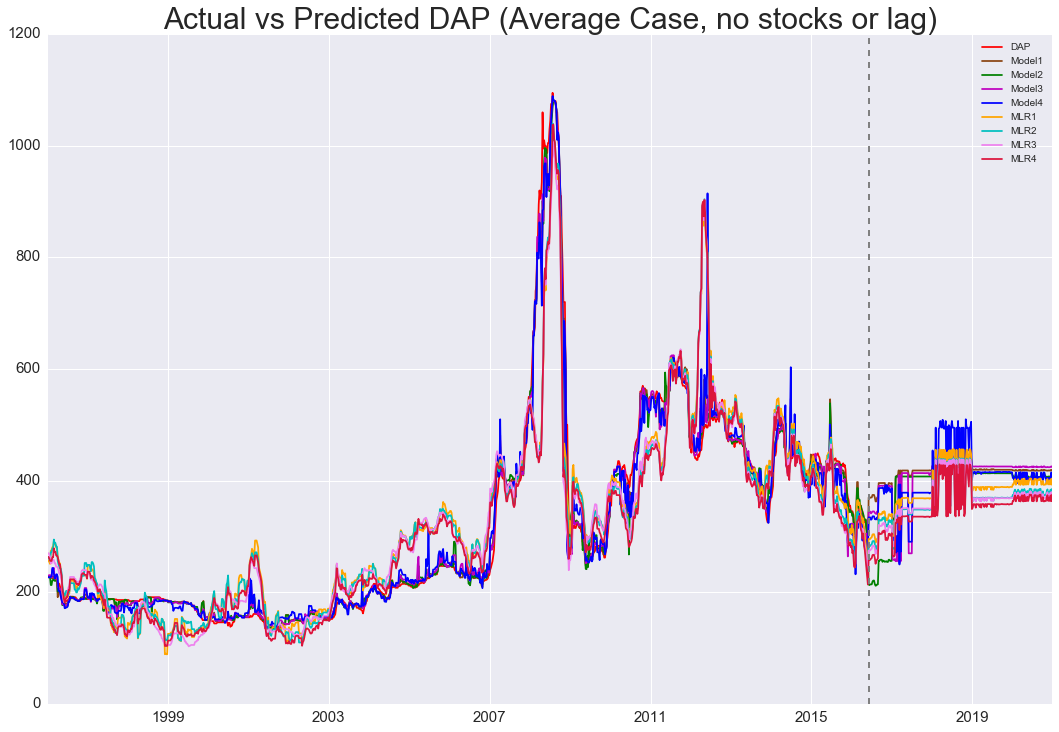

In [52]:
#looking at actual vs predicted 
import matplotlib.pyplot as plt
%matplotlib inline

y1 = (combined['DAP'])
y2 = (combined['Model1'])
y3 = (combined['Model2'])
y4 = (combined['Model3'])
y5 = (combined['Model4'])
y6 = (combined['MLR1'])
y7 = (combined['MLR2'])
y8 = (combined['MLR3'])
y9 = (combined['MLR4'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'violet')
ax.plot(y9,'crimson')
plt.axvline(x='2016-06-03', ymin=0, linewidth=2, color='gray',linestyle = '--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted DAP (Average Case, no stocks or lag)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
plt.show()
#looks eradic, probably urea prediction causing that
#may want to smooth monthly in the eratic parts
#maybe in future use uan to see if better since easier to predict, I will do in another notebook most likely

In [51]:
combined.to_csv("C:/Users/msteinme/Documents/DAPmayavgresults.csv")

# Best Case
[Top](#Table-of-Contents)

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/DAPmaybest.csv")
df_96on_nostock = data[['Date','Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP']][0:1065]
df_96on_nostock.tail()
#1/5/1996 - 5/27/2016

,Date,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP
1060,4/29/2016,232,568570.4171,139477.8947,308862.647,325
1061,5/6/2016,225,504721.1176,211180.0000,242143.957,330
1062,5/13/2016,212,504721.1176,211180.0000,242143.957,320
1063,5/20/2016,200,504721.1176,211180.0000,242143.957,311
1064,5/27/2016,189,504721.1176,211180.0000,242143.957,308


In [54]:
from datetime import datetime
df_96on_nostock['Date'] = pd.to_datetime(df_96on_nostock['Date'])
date = df_96on_nostock['Date']
print (df_96on_nostock.dtypes)
df_96on_nostock.describe()

Date                 datetime64[ns]
Urea                        float64
Phos_Inv                    float64
Phos_Exports                float64
Phos_Domestic_Use           float64
DAP                         float64
dtype: object


,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,259.853521,592872.991634,331393.061376,262331.544877,318.488263
std,135.468274,149325.503909,128496.751265,81424.770029,185.043178
min,83.000000,262900.000000,66943.220000,23156.400000,135.000000
25%,152.000000,482900.000000,235759.760000,211781.780000,184.000000
50%,240.000000,581000.000000,325936.420000,258685.232400,233.000000
75%,335.000000,687000.000000,421719.180000,310977.860000,430.000000
max,825.000000,960960.000000,741042.900000,639856.640000,1095.000000


In [55]:
#model 1
X1_nostock = df_96on_nostock[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use']].values
y1_nostock = df_96on_nostock['DAP'].values
X_train1_nostock, X_test1_nostock, y_train1_nostock, y_test1_nostock= train_test_split(X1_nostock,y1_nostock,test_size=0.3,random_state=1)
forest1_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1_nostock.fit(X_train1_nostock, y_train1_nostock)
y_train_pred1_nostock= forest1_nostock.predict(X_train1_nostock)
y_test_pred1_nostock= forest1_nostock.predict(X_test1_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1_nostock, y_train_pred1_nostock),mean_squared_error(y_test1_nostock, y_test_pred1_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1_nostock, y_train_pred1_nostock),r2_score(y_test1_nostock,y_test_pred1_nostock)))
print(forest1_nostock.feature_importances_)

MSE train: 246.457, test: 837.883
R^2 train: 0.993, test: 0.973
[ 0.85344177  0.06678999  0.04467917  0.03508907]


In [56]:
#model 2
X2_nostock = df_96on_nostock[['Urea','Phos_Inv','Phos_Exports']].values
y2_nostock = df_96on_nostock['DAP'].values
X_train2_nostock, X_test2_nostock, y_train2_nostock, y_test2_nostock= train_test_split(X2_nostock,y2_nostock,test_size=0.3,random_state=1)
forest2_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2_nostock.fit(X_train2_nostock, y_train2_nostock)
y_train_pred2_nostock= forest2_nostock.predict(X_train2_nostock)
y_test_pred2_nostock= forest2_nostock.predict(X_test2_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2_nostock, y_train_pred2_nostock),mean_squared_error(y_test2_nostock, y_test_pred2_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2_nostock, y_train_pred2_nostock),r2_score(y_test2_nostock,y_test_pred2_nostock)))
print(forest2_nostock.feature_importances_)

MSE train: 284.645, test: 947.416
R^2 train: 0.992, test: 0.970
[ 0.86232173  0.08124633  0.05643194]


In [57]:
#model 3
X3_nostock = df_96on_nostock[['Urea','Phos_Inv','Phos_Domestic_Use']].values
y3_nostock = df_96on_nostock['DAP'].values
X_train3_nostock, X_test3_nostock, y_train3_nostock, y_test3_nostock= train_test_split(X3_nostock,y3_nostock,test_size=0.3,random_state=1)
forest3_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3_nostock.fit(X_train3_nostock, y_train3_nostock)
y_train_pred3_nostock= forest3_nostock.predict(X_train3_nostock)
y_test_pred3_nostock= forest3_nostock.predict(X_test3_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3_nostock, y_train_pred3_nostock),mean_squared_error(y_test3_nostock, y_test_pred3_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3_nostock, y_train_pred3_nostock),r2_score(y_test3_nostock,y_test_pred3_nostock)))
print(forest3_nostock.feature_importances_)

MSE train: 322.970, test: 1221.810
R^2 train: 0.991, test: 0.961
[ 0.86059592  0.08216811  0.05723598]


In [58]:
#model 4
X4_nostock = df_96on_nostock[['Urea','Phos_Domestic_Use']].values
y4_nostock = df_96on_nostock['DAP'].values
X_train4_nostock, X_test4_nostock, y_train4_nostock, y_test4_nostock= train_test_split(X4_nostock,y4_nostock,test_size=0.3,random_state=1)
forest4_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4_nostock.fit(X_train4_nostock, y_train4_nostock)
y_train_pred4_nostock= forest4_nostock.predict(X_train4_nostock)
y_test_pred4_nostock= forest4_nostock.predict(X_test4_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4_nostock, y_train_pred4_nostock),mean_squared_error(y_test4_nostock, y_test_pred4_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4_nostock, y_train_pred4_nostock),r2_score(y_test4_nostock,y_test_pred4_nostock)))
print(forest4_nostock.feature_importances_)

MSE train: 453.131, test: 2053.195
R^2 train: 0.987, test: 0.934
[ 0.87771214  0.12228786]


In [59]:
# comparing models that will be used
model1 = forest1_nostock.predict(X1_nostock)
model2 = forest2_nostock.predict(X2_nostock)
model3 = forest3_nostock.predict(X3_nostock)
model4 = forest4_nostock.predict(X4_nostock)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
mlr1 = 16.4238 + (df_96on_nostock['Urea']*1.2198) + (df_96on_nostock['Phos_Inv']*0.00008614) - (df_96on_nostock['Phos_Exports']*0.00009399) - (df_96on_nostock['Phos_Domestic_Use']*0.0001)
mlr2 = -32.0428 + (df_96on_nostock['Urea']*1.2687) + (df_96on_nostock['Phos_Inv']*0.00008583) - (df_96on_nostock['Phos_Domestic_Use']*0.0001)
mlr3 = 1.8744 + (df_96on_nostock['Urea']*1.2184)
mlr4 = -80.6274 + (df_96on_nostock['Urea']*1.2901) + (df_96on_nostock['Phos_Inv']*0.0001)
df_96on_nostock['MLR1'] = mlr1
df_96on_nostock['MLR2'] = mlr2
df_96on_nostock['MLR3'] = mlr3
df_96on_nostock['MLR4'] = mlr4
df_96on_nostock['Model1'] = model1
df_96on_nostock['Model2'] = model2
df_96on_nostock['Model3'] = model3
df_96on_nostock['Model4'] = model4

df_96on_nostock.head(3)

,Date,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP,MLR1,MLR2,MLR3,MLR4,Model1,Model2,Model3,Model4
0,1996-01-05,220,599737.1134,464050.9,359287.8629,230,256.896225,262.61785,269.9224,263.168311,227.460172,227.742380,226.848892,223.711363
1,1996-01-12,220,599737.1134,464050.9,359287.8629,228,256.896225,262.61785,269.9224,263.168311,227.460172,227.742380,226.848892,223.711363
2,1996-01-19,218,599737.1134,464050.9,359287.8629,228,254.456625,260.08045,267.4856,260.588111,227.460172,227.536602,226.791750,223.649141


### Predictions Part

In [60]:
#predictions section 6/3/2016 - 12/25/2020
newpred = data[['Date','Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use']][1065:1304]
newpred1 = data [['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use']][1065:1304]  #goes with model 1
newpred2 = data[['Urea','Phos_Inv','Phos_Exports']][1065:1304] #goes with model 2 
newpred3 = data[['Urea','Phos_Inv','Phos_Domestic_Use']][1065:1304] #goes with model 3
newpred4 = data[['Urea','Phos_Domestic_Use']][1065:1304] #goes with model 4
print(newpred.tail(3))
newpred1.head(2)

            Date        Urea    Phos_Inv  Phos_Exports  Phos_Domestic_Use
1301  12/11/2020  348.961611  494836.097   173916.5418        261170.8262
1302  12/18/2020  336.027170  494836.097   173916.5418        261170.8262
1303  12/25/2020  348.132412  494836.097   173916.5418        261170.8262


,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use
1065,277.196937,445932.0646,293650.5,131116.7053
1066,287.848045,445932.0646,293650.5,131116.7053


In [61]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use'] #all variables used except dap
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred.head()

Date                 datetime64[ns]
Urea                         object
Phos_Inv                     object
Phos_Exports                 object
Phos_Domestic_Use            object
dtype: object


,Date,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use
0,2016-06-03,277.197,445932,293650,131117
1,2016-06-10,287.848,445932,293650,131117
2,2016-06-17,284.756,445932,293650,131117
3,2016-06-24,300.717,445932,293650,131117
4,2016-07-01,357.237,445932,293650,131117


In [62]:
# model 1-4 and mLR models
newpred_predicted1 = forest1_nostock.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1

newpred_predicted2 = forest2_nostock.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2

newpred_predicted3 = forest3_nostock.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3

newpred_predicted4 = forest4_nostock.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4

mlrpredicted1 = 16.4238 + (newpred['Urea']*1.2198) + (newpred['Phos_Inv']*0.00008614) - (newpred['Phos_Exports']*0.00009399) - (newpred['Phos_Domestic_Use']*0.0001)
mlrpredicted2 = -32.0428 + (newpred['Urea']*1.2687) + (newpred['Phos_Inv']*0.00008583) - (newpred['Phos_Domestic_Use']*0.0001)
mlrpredicted3 = 1.8744 + (newpred['Urea']*1.2184)
mlrpredicted4 = -80.6274 + (newpred['Urea']*1.2901) + (newpred['Phos_Inv']*0.0001)
newpred['MLR1'] = mlrpredicted1
newpred['MLR2'] = mlrpredicted2
newpred['MLR3'] = mlrpredicted3
newpred['MLR4'] = mlrpredicted4

newpred.head(2)

,Date,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,Model1,Model2,Model3,Model4,MLR1,MLR2,MLR3,MLR4
0,2016-06-03,277.197,445932,293650,131117,353.307659,338.89039,329.426536,294.046313,352.249,344.8,339.611,321.578
1,2016-06-10,287.848,445932,293650,131117,411.695152,406.66610,414.188076,394.045897,365.242,358.313,352.588,335.319


In [63]:
frames = [df_96on_nostock,newpred]
combined = pd.concat(frames)
combined.tail(2)

,DAP,Date,MLR1,MLR2,MLR3,MLR4,Model1,Model2,Model3,Model4,Phos_Domestic_Use,Phos_Exports,Phos_Inv,Urea
237,NaN,2020-12-18,426.471,410.63,411.29,402.365,408.776385,421.014919,408.378031,400.246480,261171,173917,494836,336.027
238,NaN,2020-12-25,441.237,425.987,426.039,417.982,431.574033,437.724353,423.793326,449.631187,261171,173917,494836,348.132


In [64]:
combined = combined[['Date','Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP','Model1','Model2','Model3','Model4','MLR1','MLR2','MLR3','MLR4']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP','Model1','Model2','Model3','Model4','MLR1','MLR2','MLR3','MLR4']
combined

,Date,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP,Model1,Model2,Model3,Model4,MLR1,MLR2,MLR3,MLR4
0,1996-01-05 00:00:00,220,599737,464051,359288,230,227.46,227.742,226.849,223.711,256.896,262.618,269.922,263.168
1,1996-01-12 00:00:00,220,599737,464051,359288,228,227.46,227.742,226.849,223.711,256.896,262.618,269.922,263.168
2,1996-01-19 00:00:00,218,599737,464051,359288,228,227.46,227.537,226.792,223.649,254.457,260.08,267.486,260.588
3,1996-01-26 00:00:00,215,599737,464051,359288,227,226.225,227.524,226.875,222.647,250.797,256.274,263.83,256.718
4,1996-02-02 00:00:00,205,721480,380515,183702,227,221.07,210.097,225.536,230.176,274.496,271.595,251.646,255.991
5,1996-02-09 00:00:00,205,721480,380515,183702,227,221.07,210.097,225.536,230.176,274.496,271.595,251.646,255.991
6,1996-02-16 00:00:00,210,721480,380515,183702,228,223.325,222.442,234.107,239.326,280.595,277.939,257.738,262.442
7,1996-02-23 00:00:00,210,721480,380515,183702,228,223.325,222.442,234.107,239.326,280.595,277.939,257.738,262.442
8,1996-03-01 00:00:00,210,883440,434744,157856,227,221.361,223.575,244.707,228.639,292.034,294.424,257.738,278.638
9,1996-03-08 00:00:00,205,883440,434744,157856,225,222.679,220.743,225.54,224.959,285.935,288.081,251.646,272.187


In [65]:
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined.head(2)

,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP,Model1,Model2,Model3,Model4,MLR1,MLR2,MLR3,MLR4
1996-01-05,220,599737,464051,359288,230,227.46,227.742,226.849,223.711,256.896,262.618,269.922,263.168
1996-01-12,220,599737,464051,359288,228,227.46,227.742,226.849,223.711,256.896,262.618,269.922,263.168


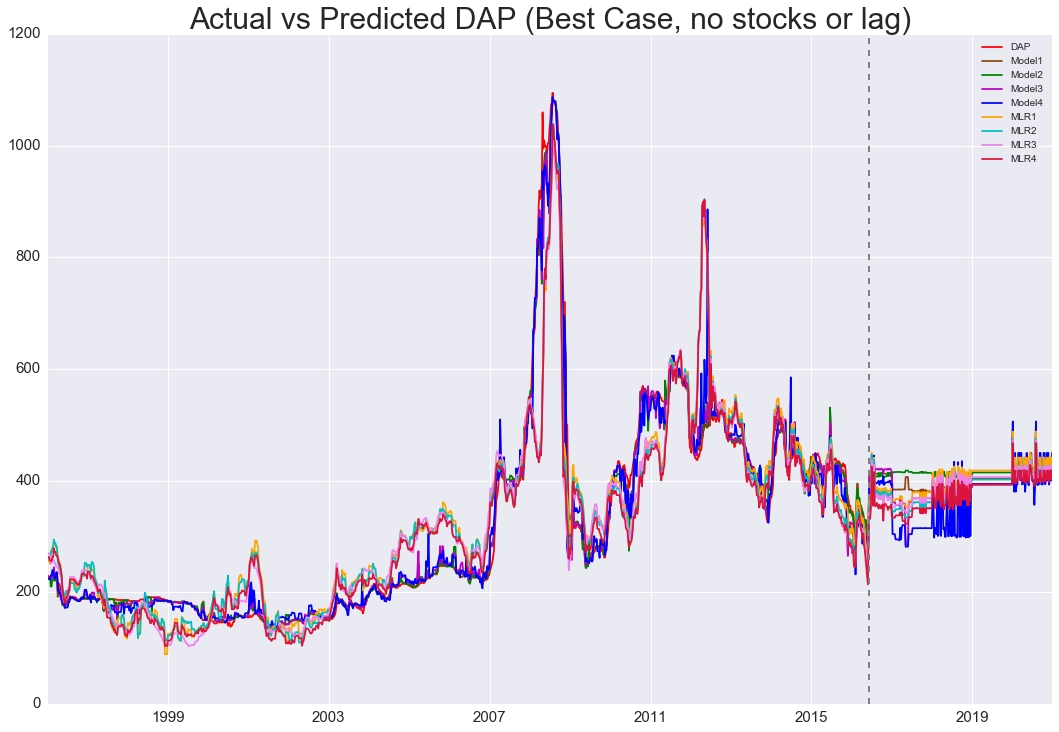

In [66]:
#looking at actual vs predicted 
import matplotlib.pyplot as plt
%matplotlib inline

y1 = (combined['DAP'])
y2 = (combined['Model1'])
y3 = (combined['Model2'])
y4 = (combined['Model3'])
y5 = (combined['Model4'])
y6 = (combined['MLR1'])
y7 = (combined['MLR2'])
y8 = (combined['MLR3'])
y9 = (combined['MLR4'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'violet')
ax.plot(y9,'crimson')
plt.axvline(x='2016-06-03', ymin=0, linewidth=2, color='gray',linestyle = '--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted DAP (Best Case, no stocks or lag)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
plt.show()

In [67]:
combined.to_csv("C:/Users/msteinme/Documents/DAPmaybestresults.csv")

# Worst Case
[Top](#Table-of-Contents)

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/DAPmayworst.csv")
df_96on_nostock = data[['Date','Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP']][0:1065]
df_96on_nostock.tail()
#1/5/1996 - 5/27/2016

,Date,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP
1060,4/29/2016,232,568570.4171,139477.8947,308862.647,325
1061,5/6/2016,225,504721.1176,211180.0000,242143.957,330
1062,5/13/2016,212,504721.1176,211180.0000,242143.957,320
1063,5/20/2016,200,504721.1176,211180.0000,242143.957,311
1064,5/27/2016,189,504721.1176,211180.0000,242143.957,308


In [69]:
from datetime import datetime
df_96on_nostock['Date'] = pd.to_datetime(df_96on_nostock['Date'])
date = df_96on_nostock['Date']
print (df_96on_nostock.dtypes)
df_96on_nostock.describe()

Date                 datetime64[ns]
Urea                        float64
Phos_Inv                    float64
Phos_Exports                float64
Phos_Domestic_Use           float64
DAP                         float64
dtype: object


,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,259.853521,592872.991634,331393.061376,262331.544877,318.488263
std,135.468274,149325.503909,128496.751265,81424.770029,185.043178
min,83.000000,262900.000000,66943.220000,23156.400000,135.000000
25%,152.000000,482900.000000,235759.760000,211781.780000,184.000000
50%,240.000000,581000.000000,325936.420000,258685.232400,233.000000
75%,335.000000,687000.000000,421719.180000,310977.860000,430.000000
max,825.000000,960960.000000,741042.900000,639856.640000,1095.000000


In [70]:
#model 1
X1_nostock = df_96on_nostock[['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use']].values
y1_nostock = df_96on_nostock['DAP'].values
X_train1_nostock, X_test1_nostock, y_train1_nostock, y_test1_nostock= train_test_split(X1_nostock,y1_nostock,test_size=0.3,random_state=1)
forest1_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1_nostock.fit(X_train1_nostock, y_train1_nostock)
y_train_pred1_nostock= forest1_nostock.predict(X_train1_nostock)
y_test_pred1_nostock= forest1_nostock.predict(X_test1_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1_nostock, y_train_pred1_nostock),mean_squared_error(y_test1_nostock, y_test_pred1_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1_nostock, y_train_pred1_nostock),r2_score(y_test1_nostock,y_test_pred1_nostock)))
print(forest1_nostock.feature_importances_)

MSE train: 221.639, test: 781.527
R^2 train: 0.994, test: 0.975
[ 0.85029542  0.06896431  0.04720114  0.03353913]


In [71]:
#model 2
X2_nostock = df_96on_nostock[['Urea','Phos_Inv','Phos_Exports']].values
y2_nostock = df_96on_nostock['DAP'].values
X_train2_nostock, X_test2_nostock, y_train2_nostock, y_test2_nostock= train_test_split(X2_nostock,y2_nostock,test_size=0.3,random_state=1)
forest2_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2_nostock.fit(X_train2_nostock, y_train2_nostock)
y_train_pred2_nostock= forest2_nostock.predict(X_train2_nostock)
y_test_pred2_nostock= forest2_nostock.predict(X_test2_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2_nostock, y_train_pred2_nostock),mean_squared_error(y_test2_nostock, y_test_pred2_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2_nostock, y_train_pred2_nostock),r2_score(y_test2_nostock,y_test_pred2_nostock)))
print(forest2_nostock.feature_importances_)

MSE train: 289.541, test: 925.619
R^2 train: 0.992, test: 0.970
[ 0.85732614  0.08789481  0.05477905]


In [72]:
#model 3
X3_nostock = df_96on_nostock[['Urea','Phos_Inv','Phos_Domestic_Use']].values
y3_nostock = df_96on_nostock['DAP'].values
X_train3_nostock, X_test3_nostock, y_train3_nostock, y_test3_nostock= train_test_split(X3_nostock,y3_nostock,test_size=0.3,random_state=1)
forest3_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3_nostock.fit(X_train3_nostock, y_train3_nostock)
y_train_pred3_nostock= forest3_nostock.predict(X_train3_nostock)
y_test_pred3_nostock= forest3_nostock.predict(X_test3_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3_nostock, y_train_pred3_nostock),mean_squared_error(y_test3_nostock, y_test_pred3_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3_nostock, y_train_pred3_nostock),r2_score(y_test3_nostock,y_test_pred3_nostock)))
print(forest3_nostock.feature_importances_)

MSE train: 311.990, test: 1230.346
R^2 train: 0.991, test: 0.961
[ 0.86054454  0.07725623  0.06219923]


In [73]:
#model 4
X4_nostock = df_96on_nostock[['Urea','Phos_Domestic_Use']].values
y4_nostock = df_96on_nostock['DAP'].values
X_train4_nostock, X_test4_nostock, y_train4_nostock, y_test4_nostock= train_test_split(X4_nostock,y4_nostock,test_size=0.3,random_state=1)
forest4_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4_nostock.fit(X_train4_nostock, y_train4_nostock)
y_train_pred4_nostock= forest4_nostock.predict(X_train4_nostock)
y_test_pred4_nostock= forest4_nostock.predict(X_test4_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4_nostock, y_train_pred4_nostock),mean_squared_error(y_test4_nostock, y_test_pred4_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4_nostock, y_train_pred4_nostock),r2_score(y_test4_nostock,y_test_pred4_nostock)))
print(forest4_nostock.feature_importances_)

MSE train: 487.451, test: 2133.245
R^2 train: 0.986, test: 0.932
[ 0.88121792  0.11878208]


In [74]:
# comparing models that will be used
model1 = forest1_nostock.predict(X1_nostock)
model2 = forest2_nostock.predict(X2_nostock)
model3 = forest3_nostock.predict(X3_nostock)
model4 = forest4_nostock.predict(X4_nostock)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
mlr1 = 16.4238 + (df_96on_nostock['Urea']*1.2198) + (df_96on_nostock['Phos_Inv']*0.00008614) - (df_96on_nostock['Phos_Exports']*0.00009399) - (df_96on_nostock['Phos_Domestic_Use']*0.0001)
mlr2 = -32.0428 + (df_96on_nostock['Urea']*1.2687) + (df_96on_nostock['Phos_Inv']*0.00008583) - (df_96on_nostock['Phos_Domestic_Use']*0.0001)
mlr3 = 1.8744 + (df_96on_nostock['Urea']*1.2184)
mlr4 = -80.6274 + (df_96on_nostock['Urea']*1.2901) + (df_96on_nostock['Phos_Inv']*0.0001)
df_96on_nostock['MLR1'] = mlr1
df_96on_nostock['MLR2'] = mlr2
df_96on_nostock['MLR3'] = mlr3
df_96on_nostock['MLR4'] = mlr4
df_96on_nostock['Model1'] = model1
df_96on_nostock['Model2'] = model2
df_96on_nostock['Model3'] = model3
df_96on_nostock['Model4'] = model4

df_96on_nostock.head(3)

,Date,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP,MLR1,MLR2,MLR3,MLR4,Model1,Model2,Model3,Model4
0,1996-01-05,220,599737.1134,464050.9,359287.8629,230,256.896225,262.61785,269.9224,263.168311,228.132263,227.922211,227.679675,224.966081
1,1996-01-12,220,599737.1134,464050.9,359287.8629,228,256.896225,262.61785,269.9224,263.168311,228.132263,227.922211,227.679675,224.966081
2,1996-01-19,218,599737.1134,464050.9,359287.8629,228,254.456625,260.08045,267.4856,260.588111,228.052263,227.877211,227.633961,224.766081


### Predictions Part

In [80]:
#predictions section 6/3/2016 - 12/25/2020
newpred = data[['Date','Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use']][1065:1304]
newpred1 = data [['Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use']][1065:1304]  #goes with model 1
newpred2 = data[['Urea','Phos_Inv','Phos_Exports']][1065:1304] #goes with model 2 
newpred3 = data[['Urea','Phos_Inv','Phos_Domestic_Use']][1065:1304] #goes with model 3
newpred4 = data[['Urea','Phos_Domestic_Use']][1065:1304] #goes with model 4
print(newpred.tail(3))
newpred1.head(2)

            Date        Urea     Phos_Inv  Phos_Exports  Phos_Domestic_Use
1301  12/11/2020  234.305541  604799.6741   142295.3524        213685.2214
1302  12/18/2020  229.200852  604799.6741   142295.3524        213685.2214
1303  12/25/2020  226.909020  604799.6741   142295.3524        213685.2214


,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use
1065,223.794286,545028.0789,240259.5,107277.3043
1066,231.023571,545028.0789,240259.5,107277.3043


In [81]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use'] #all variables used except dap
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred.head()

Date                 datetime64[ns]
Urea                         object
Phos_Inv                     object
Phos_Exports                 object
Phos_Domestic_Use            object
dtype: object


,Date,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use
0,2016-06-03,223.794,545028,240260,107277
1,2016-06-10,231.024,545028,240260,107277
2,2016-06-17,215.251,545028,240260,107277
3,2016-06-24,213.537,545028,240260,107277
4,2016-07-01,201.794,545028,240260,107277


In [82]:
# model 1-4 and mLR models
newpred_predicted1 = forest1_nostock.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1

newpred_predicted2 = forest2_nostock.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2

newpred_predicted3 = forest3_nostock.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3

newpred_predicted4 = forest4_nostock.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4

mlrpredicted1 = 16.4238 + (newpred['Urea']*1.2198) + (newpred['Phos_Inv']*0.00008614) - (newpred['Phos_Exports']*0.00009399) - (newpred['Phos_Domestic_Use']*0.0001)
mlrpredicted2 = -32.0428 + (newpred['Urea']*1.2687) + (newpred['Phos_Inv']*0.00008583) - (newpred['Phos_Domestic_Use']*0.0001)
mlrpredicted3 = 1.8744 + (newpred['Urea']*1.2184)
mlrpredicted4 = -80.6274 + (newpred['Urea']*1.2901) + (newpred['Phos_Inv']*0.0001)
newpred['MLR1'] = mlrpredicted1
newpred['MLR2'] = mlrpredicted2
newpred['MLR3'] = mlrpredicted3
newpred['MLR4'] = mlrpredicted4

newpred.head(2)

,Date,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,Model1,Model2,Model3,Model4,MLR1,MLR2,MLR3,MLR4
0,2016-06-03,223.794,545028,240260,107277,362.080,221.562791,339.517910,331.798815,303.047,287.937,274.545,262.592
1,2016-06-10,231.024,545028,240260,107277,365.902,225.506777,345.253099,331.333259,311.865,297.109,283.354,271.919


In [83]:
frames = [df_96on_nostock,newpred]
combined = pd.concat(frames)
combined.tail(2)

,DAP,Date,MLR1,MLR2,MLR3,MLR4,Model1,Model2,Model3,Model4,Phos_Domestic_Use,Phos_Exports,Phos_Inv,Urea
237,NaN,2020-12-18,313.358,289.286,281.133,275.545,346.432,334.932083,240.454398,279.987362,213685,142295,604800,229.201
238,NaN,2020-12-25,310.562,286.378,278.34,272.588,345.472,333.892083,242.512616,269.477481,213685,142295,604800,226.909


In [84]:
combined = combined[['Date','Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP','Model1','Model2','Model3','Model4','MLR1','MLR2','MLR3','MLR4']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Urea','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP','Model1','Model2','Model3','Model4','MLR1','MLR2','MLR3','MLR4']
combined

,Date,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP,Model1,Model2,Model3,Model4,MLR1,MLR2,MLR3,MLR4
0,1996-01-05 00:00:00,220,599737,464051,359288,230,228.132,227.922,227.68,224.966,256.896,262.618,269.922,263.168
1,1996-01-12 00:00:00,220,599737,464051,359288,228,228.132,227.922,227.68,224.966,256.896,262.618,269.922,263.168
2,1996-01-19 00:00:00,218,599737,464051,359288,228,228.052,227.877,227.634,224.766,254.457,260.08,267.486,260.588
3,1996-01-26 00:00:00,215,599737,464051,359288,227,227.82,227.999,226.999,223.612,250.797,256.274,263.83,256.718
4,1996-02-02 00:00:00,205,721480,380515,183702,227,222.692,213.465,225.752,230.715,274.496,271.595,251.646,255.991
5,1996-02-09 00:00:00,205,721480,380515,183702,227,222.692,213.465,225.752,230.715,274.496,271.595,251.646,255.991
6,1996-02-16 00:00:00,210,721480,380515,183702,228,225.688,221.096,242.689,241.338,280.595,277.939,257.738,262.442
7,1996-02-23 00:00:00,210,721480,380515,183702,228,225.688,221.096,242.689,241.338,280.595,277.939,257.738,262.442
8,1996-03-01 00:00:00,210,883440,434744,157856,227,221.754,223.35,240.95,230.161,292.034,294.424,257.738,278.638
9,1996-03-08 00:00:00,205,883440,434744,157856,225,222.975,222.206,223.617,224.036,285.935,288.081,251.646,272.187


In [85]:
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined.head(2)

,Urea,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP,Model1,Model2,Model3,Model4,MLR1,MLR2,MLR3,MLR4
1996-01-05,220,599737,464051,359288,230,228.132,227.922,227.68,224.966,256.896,262.618,269.922,263.168
1996-01-12,220,599737,464051,359288,228,228.132,227.922,227.68,224.966,256.896,262.618,269.922,263.168


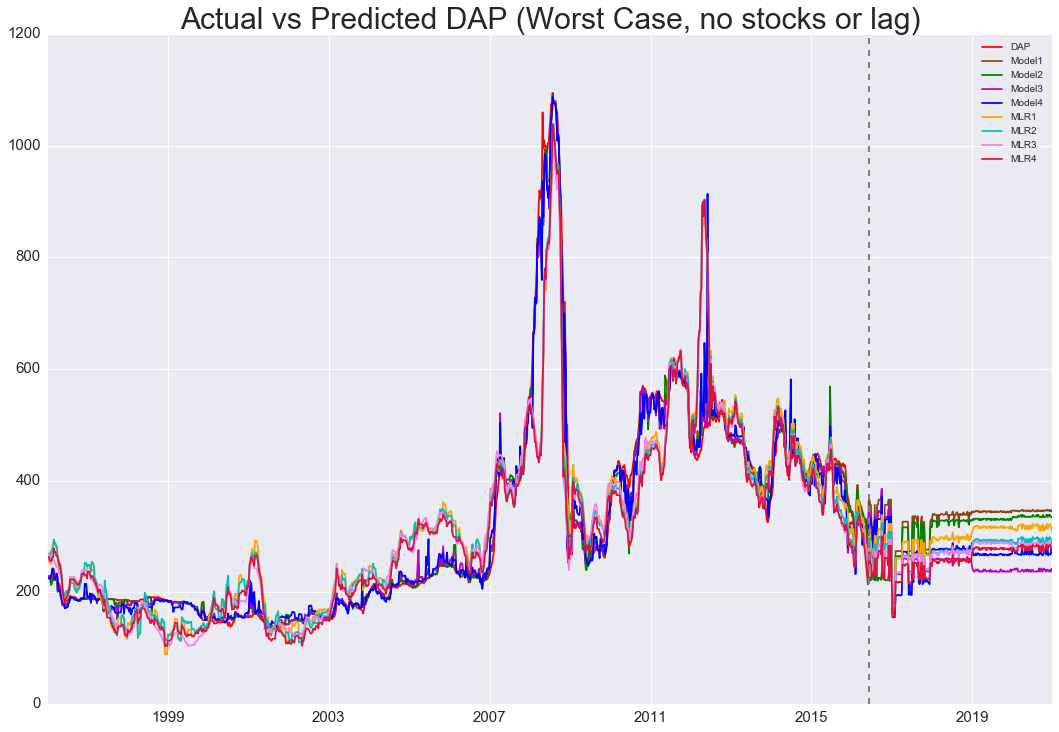

In [86]:
#looking at actual vs predicted 
import matplotlib.pyplot as plt
%matplotlib inline

y1 = (combined['DAP'])
y2 = (combined['Model1'])
y3 = (combined['Model2'])
y4 = (combined['Model3'])
y5 = (combined['Model4'])
y6 = (combined['MLR1'])
y7 = (combined['MLR2'])
y8 = (combined['MLR3'])
y9 = (combined['MLR4'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'violet')
ax.plot(y9,'crimson')
plt.axvline(x='2016-06-03', ymin=0, linewidth=2, color='gray',linestyle = '--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted DAP (Worst Case, no stocks or lag)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
plt.show()

In [87]:
combined.to_csv("C:/Users/msteinme/Documents/DAPmayworstresults.csv")